## Student Learning Analysis

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [3]:
eng_learn_df = pd.read_csv('english_dataset.csv')
eng_learn_df.head(3)

Session_ID Student_ID           Start_Time             End_Time  \
0  Session0001       S051  2024-01-01 08:00:00  2024-01-01 09:00:00   
1  Session0002       S032  2024-01-01 09:00:00  2024-01-01 10:00:00   
2  Session0003       S084  2024-01-01 10:00:00  2024-01-01 11:00:00   

  Session_Type Device_ID    Location  Engagement_Level Environment_Conditions  \
0   Vocabulary  Device10   Classroom                53        22°C, 59% light   
1    Listening   Device4   Classroom                58        20°C, 52% light   
2    Listening  Device10  Study Hall                75        22°C, 76% light   

  Activity_Status Data_Processing_Location  Response_Time Model_Used  \
0        Inactive                    Cloud         171.20  Basic ANN   
1          Active                    Cloud         370.41  Basic ANN   
2          Active          Local Edge Node         456.33  Basic ANN   

   Quiz_Score  Time_Spent Task_Completion_Status  Mistakes_Observed  \
0          88          49             Incomplete                  4   
1          89          24             Incomplete                  4   
2          87          10              Completed                  4   

            Feedback  
0  Needs Improvement  
1  Needs Improvement  
2  Needs Improvement

#### Shape

In [4]:
eng_learn_df.shape

(500, 18)

#### Columns

In [5]:
eng_learn_df.columns

Index(['Session_ID', 'Student_ID', 'Start_Time', 'End_Time', 'Session_Type',
       'Device_ID', 'Location', 'Engagement_Level', 'Environment_Conditions',
       'Activity_Status', 'Data_Processing_Location', 'Response_Time',
       'Model_Used', 'Quiz_Score', 'Time_Spent', 'Task_Completion_Status',
       'Mistakes_Observed', 'Feedback'],
      dtype='object')

#### Dataframe Information

In [6]:
eng_learn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Session_ID                500 non-null    object 
 1   Student_ID                500 non-null    object 
 2   Start_Time                500 non-null    object 
 3   End_Time                  500 non-null    object 
 4   Session_Type              500 non-null    object 
 5   Device_ID                 500 non-null    object 
 6   Location                  500 non-null    object 
 7   Engagement_Level          500 non-null    int64  
 8   Environment_Conditions    500 non-null    object 
 9   Activity_Status           500 non-null    object 
 10  Data_Processing_Location  500 non-null    object 
 11  Response_Time             500 non-null    float64
 12  Model_Used                500 non-null    object 
 13  Quiz_Score                500 non-null    int64  
 14  Time_Spent

## Statistics

#### Correlations

In [7]:
eng_learn_df.corr(numeric_only=True)

Engagement_Level  Response_Time  Quiz_Score  Time_Spent  \
Engagement_Level           1.000000       0.026618   -0.059220   -0.008349   
Response_Time              0.026618       1.000000    0.007731   -0.002475   
Quiz_Score                -0.059220       0.007731    1.000000   -0.027374   
Time_Spent                -0.008349      -0.002475   -0.027374    1.000000   
Mistakes_Observed         -0.006467      -0.076497    0.080252   -0.016223   

                   Mistakes_Observed  
Engagement_Level           -0.006467  
Response_Time              -0.076497  
Quiz_Score                  0.080252  
Time_Spent                 -0.016223  
Mistakes_Observed           1.000000

#### Quantiles

In [8]:
eng_learn_df.describe()

Engagement_Level  Response_Time  Quiz_Score  Time_Spent  \
count        500.000000     500.000000  500.000000   500.00000   
mean          73.922000     295.847260   74.552000    34.84600   
std           14.582772     119.163245   14.664563    14.04039   
min           50.000000     101.860000   50.000000    10.00000   
25%           61.000000     189.422500   61.000000    23.00000   
50%           73.000000     289.560000   75.000000    36.00000   
75%           87.000000     402.497500   87.000000    47.00000   
max           99.000000     499.820000   99.000000    59.00000   

       Mistakes_Observed  
count          500.00000  
mean             1.91800  
std              1.42806  
min              0.00000  
25%              1.00000  
50%              2.00000  
75%              3.00000  
max              4.00000

## Data Cleaning

#### Remove Duplicates

In [9]:
eng_learn_df.duplicated().sum()

0

#### Nulls

In [10]:
eng_learn_df.isnull().sum()

Session_ID                  0
Student_ID                  0
Start_Time                  0
End_Time                    0
Session_Type                0
Device_ID                   0
Location                    0
Engagement_Level            0
Environment_Conditions      0
Activity_Status             0
Data_Processing_Location    0
Response_Time               0
Model_Used                  0
Quiz_Score                  0
Time_Spent                  0
Task_Completion_Status      0
Mistakes_Observed           0
Feedback                    0
dtype: int64

#### Dtype Casting

In [11]:
eng_learn_df['Start_Time'] = pd.to_datetime(eng_learn_df['Start_Time'])

In [12]:
eng_learn_df['End_Time'] = pd.to_datetime(eng_learn_df['End_Time'])

#### Feature Extraction

In [13]:
eng_learn_df['Temperature'] = eng_learn_df['Environment_Conditions'].apply(lambda x: int(''.join([i for i in x.split(', ')[0] if i.isnumeric()])))

In [14]:
eng_learn_df['Light'] = eng_learn_df['Environment_Conditions'].apply(lambda x: int(''.join([i for i in x.split(', ')[1] if i.isnumeric()])))

In [15]:
eng_learn_df.head(3)

Session_ID Student_ID          Start_Time            End_Time  \
0  Session0001       S051 2024-01-01 08:00:00 2024-01-01 09:00:00   
1  Session0002       S032 2024-01-01 09:00:00 2024-01-01 10:00:00   
2  Session0003       S084 2024-01-01 10:00:00 2024-01-01 11:00:00   

  Session_Type Device_ID    Location  Engagement_Level Environment_Conditions  \
0   Vocabulary  Device10   Classroom                53        22°C, 59% light   
1    Listening   Device4   Classroom                58        20°C, 52% light   
2    Listening  Device10  Study Hall                75        22°C, 76% light   

  Activity_Status Data_Processing_Location  Response_Time Model_Used  \
0        Inactive                    Cloud         171.20  Basic ANN   
1          Active                    Cloud         370.41  Basic ANN   
2          Active          Local Edge Node         456.33  Basic ANN   

   Quiz_Score  Time_Spent Task_Completion_Status  Mistakes_Observed  \
0          88          49             Incomplete                  4   
1          89          24             Incomplete                  4   
2          87          10              Completed                  4   

            Feedback  Temperature  Light  
0  Needs Improvement           22     59  
1  Needs Improvement           20     52  
2  Needs Improvement           22     76

#### Drop Unwanted Cols

In [16]:
eng_learn_df.drop(columns=['Start_Time', 'End_Time', 'Environment_Conditions', 'Session_ID'], inplace=True)

In [17]:
eng_learn_df.head(3)

Student_ID Session_Type Device_ID    Location  Engagement_Level  \
0       S051   Vocabulary  Device10   Classroom                53   
1       S032    Listening   Device4   Classroom                58   
2       S084    Listening  Device10  Study Hall                75   

  Activity_Status Data_Processing_Location  Response_Time Model_Used  \
0        Inactive                    Cloud         171.20  Basic ANN   
1          Active                    Cloud         370.41  Basic ANN   
2          Active          Local Edge Node         456.33  Basic ANN   

   Quiz_Score  Time_Spent Task_Completion_Status  Mistakes_Observed  \
0          88          49             Incomplete                  4   
1          89          24             Incomplete                  4   
2          87          10              Completed                  4   

            Feedback  Temperature  Light  
0  Needs Improvement           22     59  
1  Needs Improvement           20     52  
2  Needs Improvement           22     76

#### Students Dataframe

In [18]:
total_quiz_scores = eng_learn_df.groupby(by='Student_ID')['Quiz_Score'].sum()
students_df = pd.DataFrame(data = total_quiz_scores.values, index = total_quiz_scores.index, columns=['Total_Quiz_Score'])
students_df.reset_index(inplace=True)
students_df

Student_ID  Total_Quiz_Score
0        S001               627
1        S002               409
2        S003               285
3        S004               280
4        S005               347
..        ...               ...
94       S096               120
95       S097               310
96       S098               214
97       S099               454
98       S100               578

[99 rows x 2 columns]

In [19]:
total_time_spent = eng_learn_df.groupby(by='Student_ID')['Time_Spent'].sum()
time_spent_df = pd.DataFrame(data = total_time_spent.values, index= total_time_spent.index, columns=['Total_Time_Spent'])
time_spent_df.reset_index(inplace=True)
students_df = pd.merge(students_df, time_spent_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent
0        S001               627               296
1        S002               409               205
2        S003               285               127
3        S004               280               127
4        S005               347               208
..        ...               ...               ...
94       S096               120                52
95       S097               310               205
96       S098               214                99
97       S099               454               159
98       S100               578               276

[99 rows x 3 columns]

In [20]:
total_mistakes = eng_learn_df.groupby(by='Student_ID')['Mistakes_Observed'].sum()
mistakes_df = pd.DataFrame(data = total_mistakes.values, index= total_mistakes.index, columns=['Total_Mistakes'])
mistakes_df.reset_index(inplace=True)
students_df = pd.merge(students_df, mistakes_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes
0        S001               627               296              13
1        S002               409               205               9
2        S003               285               127               6
3        S004               280               127               8
4        S005               347               208              11
..        ...               ...               ...             ...
94       S096               120                52               2
95       S097               310               205               8
96       S098               214                99               9
97       S099               454               159              17
98       S100               578               276              20

[99 rows x 4 columns]

In [21]:
total_engangements = eng_learn_df.groupby(by='Student_ID')['Engagement_Level'].sum()
engangements_df = pd.DataFrame(data = total_engangements.values, index= total_engangements.index, columns=['Total_Engangement_Level'])
engangements_df.reset_index(inplace=True)
students_df = pd.merge(students_df, engangements_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  
0                       611  
1                       412  
2                       282  
3                       255  
4                       356  
..                      ...  
94                      112  
95                      363  
96                      244  
97                      440  
98                      537  

[99 rows x 5 columns]

In [22]:
total_response_time = eng_learn_df.groupby(by='Student_ID')['Response_Time'].sum()
response_time_df = pd.DataFrame(data = total_response_time.values, index= total_response_time.index, columns=['Total_Response_Time'])
response_time_df.reset_index(inplace=True)
students_df = pd.merge(students_df, response_time_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  Total_Response_Time  
0                       611              2040.31  
1                       412              2193.90  
2                       282              1110.94  
3                       255              1254.81  
4                       356              1108.62  
..                      ...                  ...  
94                      112               676.97  
95                      363              1654.51  
96                      244               919.80  
97                      440              1424.35  
98                      537              2596.27  

[99 rows x 6 columns]

In [23]:
active_status = eng_learn_df.groupby(by=['Student_ID', 'Activity_Status'])['Activity_Status'].apply(lambda x: len(x))
status_df = pd.DataFrame(index=active_status.index, data = active_status.values).unstack('Activity_Status')
status_df.fillna(0, inplace=True)
status_df = status_df.reset_index().rename(columns={'':'Student_ID'}).droplevel(level=[0, ], axis = 1)
students_df = pd.merge(students_df, status_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  Total_Response_Time  Active  Inactive  
0                       611              2040.31     4.0       4.0  
1                       412              2193.90     2.0       4.0  
2                       282              1110.94     1.0       3.0  
3                       255              1254.81     2.0       2.0  
4                       356              1108.62     4.0       1.0  
..                      ...                  ...     ...       ...  
94                      112               676.97     0.0       2.0  
95                      363              1654.51     2.0       3.0  
96                      244               919.80     0.0       3.0  
97                      440              1424.35     2.0       4.0  
98                      537              2596.27     3.0       5.0  

[99 rows x 8 columns]

In [24]:
task_completion = eng_learn_df.groupby(by=['Student_ID', 'Task_Completion_Status'])['Task_Completion_Status'].apply(lambda x: len(x))
task_completion_df = pd.DataFrame(index=task_completion.index, data = task_completion.values).unstack('Task_Completion_Status')
task_completion_df.fillna(0, inplace=True)
task_completion_df = task_completion_df.reset_index().rename(columns={'':'Student_ID'}).droplevel(level=[0, ], axis = 1)
students_df = pd.merge(students_df, task_completion_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  Total_Response_Time  Active  Inactive  Completed  \
0                       611              2040.31     4.0       4.0        5.0   
1                       412              2193.90     2.0       4.0        3.0   
2                       282              1110.94     1.0       3.0        3.0   
3                       255              1254.81     2.0       2.0        3.0   
4                       356              1108.62     4.0       1.0        2.0   
..                      ...                  ...     ...       ...        ...   
94                      112               676.97     0.0       2.0        1.0   
95                      363              1654.51     2.0       3.0        3.0   
96                      244               919.80     0.0       3.0        0.0   
97                      440              1424.35     2.0       4.0        3.0   
98                      537              2596.27     3.0       5.0        4.0   

    Incomplete  
0          3.0  
1          3.0  
2          1.0  
3          1.0  
4          3.0  
..         ...  
94         1.0  
95         2.0  
96         3.0  
97         3.0  
98         4.0  

[99 rows x 10 columns]

In [25]:
location = eng_learn_df.groupby(by=['Student_ID', 'Location'])['Location'].apply(lambda x: len(x))
location_df = pd.DataFrame(index=location.index, data = location.values).unstack('Location')
location_df.fillna(0, inplace=True)
location_df = location_df.reset_index().rename(columns={'':'Student_ID'}).droplevel(level=[0, ], axis = 1)
students_df = pd.merge(students_df, location_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  Total_Response_Time  Active  Inactive  Completed  \
0                       611              2040.31     4.0       4.0        5.0   
1                       412              2193.90     2.0       4.0        3.0   
2                       282              1110.94     1.0       3.0        3.0   
3                       255              1254.81     2.0       2.0        3.0   
4                       356              1108.62     4.0       1.0        2.0   
..                      ...                  ...     ...       ...        ...   
94                      112               676.97     0.0       2.0        1.0   
95                      363              1654.51     2.0       3.0        3.0   
96                      244               919.80     0.0       3.0        0.0   
97                      440              1424.35     2.0       4.0        3.0   
98                      537              2596.27     3.0       5.0        4.0   

    Incomplete  Classroom  Study Hall  
0          3.0        6.0         2.0  
1          3.0        3.0         3.0  
2          1.0        3.0         1.0  
3          1.0        3.0         1.0  
4          3.0        3.0         2.0  
..         ...        ...         ...  
94         1.0        2.0         0.0  
95         2.0        3.0         2.0  
96         3.0        2.0         1.0  
97         3.0        6.0         0.0  
98         4.0        3.0         5.0  

[99 rows x 12 columns]

In [26]:
sessions = eng_learn_df.groupby(by=['Student_ID', 'Session_Type'])['Session_Type'].apply(lambda x: len(x))
sessions_df = pd.DataFrame(index=sessions.index, data = sessions.values).unstack('Session_Type')
sessions_df.fillna(0, inplace=True)
sessions_df = sessions_df.reset_index().rename(columns={'':'Student_ID'}).droplevel(level=[0, ], axis = 1)
students_df = pd.merge(students_df, sessions_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  Total_Response_Time  Active  Inactive  Completed  \
0                       611              2040.31     4.0       4.0        5.0   
1                       412              2193.90     2.0       4.0        3.0   
2                       282              1110.94     1.0       3.0        3.0   
3                       255              1254.81     2.0       2.0        3.0   
4                       356              1108.62     4.0       1.0        2.0   
..                      ...                  ...     ...       ...        ...   
94                      112               676.97     0.0       2.0        1.0   
95                      363              1654.51     2.0       3.0        3.0   
96                      244               919.80     0.0       3.0        0.0   
97                      440              1424.35     2.0       4.0        3.0   
98                      537              2596.27     3.0       5.0        4.0   

    Incomplete  Classroom  Study Hall  Listening  Reading  Vocabulary  Writing  
0          3.0        6.0         2.0        2.0      4.0         1.0      1.0  
1          3.0        3.0         3.0        1.0      2.0         1.0      2.0  
2          1.0        3.0         1.0        2.0      0.0         1.0      1.0  
3          1.0        3.0         1.0        2.0      0.0         2.0      0.0  
4          3.0        3.0         2.0        0.0      2.0         2.0      1.0  
..         ...        ...         ...        ...      ...         ...      ...  
94         1.0        2.0         0.0        0.0      0.0         1.0      1.0  
95         2.0        3.0         2.0        0.0      2.0         2.0      1.0  
96         3.0        2.0         1.0        2.0      1.0         0.0      0.0  
97         3.0        6.0         0.0        1.0      3.0         2.0      0.0  
98         4.0        3.0         5.0        2.0      1.0         3.0      2.0  

[99 rows x 16 columns]

In [27]:
data_pr_loc = eng_learn_df.groupby(by=['Student_ID', 'Data_Processing_Location'])['Data_Processing_Location'].apply(lambda x: len(x))
data_pr_loc_df = pd.DataFrame(index=data_pr_loc.index, data = data_pr_loc.values).unstack('Data_Processing_Location')
data_pr_loc_df.fillna(0, inplace=True)
data_pr_loc_df = data_pr_loc_df.reset_index().rename(columns={'':'Student_ID'}).droplevel(level=[0, ], axis = 1)
students_df = pd.merge(students_df, data_pr_loc_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  Total_Response_Time  Active  Inactive  Completed  \
0                       611              2040.31     4.0       4.0        5.0   
1                       412              2193.90     2.0       4.0        3.0   
2                       282              1110.94     1.0       3.0        3.0   
3                       255              1254.81     2.0       2.0        3.0   
4                       356              1108.62     4.0       1.0        2.0   
..                      ...                  ...     ...       ...        ...   
94                      112               676.97     0.0       2.0        1.0   
95                      363              1654.51     2.0       3.0        3.0   
96                      244               919.80     0.0       3.0        0.0   
97                      440              1424.35     2.0       4.0        3.0   
98                      537              2596.27     3.0       5.0        4.0   

    Incomplete  Classroom  Study Hall  Listening  Reading  Vocabulary  \
0          3.0        6.0         2.0        2.0      4.0         1.0   
1          3.0        3.0         3.0        1.0      2.0         1.0   
2          1.0        3.0         1.0        2.0      0.0         1.0   
3          1.0        3.0         1.0        2.0      0.0         2.0   
4          3.0        3.0         2.0        0.0      2.0         2.0   
..         ...        ...         ...        ...      ...         ...   
94         1.0        2.0         0.0        0.0      0.0         1.0   
95         2.0        3.0         2.0        0.0      2.0         2.0   
96         3.0        2.0         1.0        2.0      1.0         0.0   
97         3.0        6.0         0.0        1.0      3.0         2.0   
98         4.0        3.0         5.0        2.0      1.0         3.0   

    Writing  Cloud  Local Edge Node  
0       1.0    5.0              3.0  
1       2.0    3.0              3.0  
2       1.0    2.0              2.0  
3       0.0    1.0              3.0  
4       1.0    3.0              2.0  
..      ...    ...              ...  
94      1.0    2.0              0.0  
95      1.0    5.0              0.0  
96      0.0    3.0              0.0  
97      0.0    3.0              3.0  
98      2.0    2.0              6.0  

[99 rows x 18 columns]

In [28]:
model_used = eng_learn_df.groupby(by=['Student_ID', 'Model_Used'])['Model_Used'].apply(lambda x: len(x))
model_used_df = pd.DataFrame(index=model_used.index, data = model_used.values).unstack('Model_Used')
model_used_df.fillna(0, inplace=True)
model_used_df = model_used_df.reset_index().rename(columns={'':'Student_ID'}).droplevel(level=[0, ], axis = 1)
students_df = pd.merge(students_df, model_used_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  Total_Response_Time  Active  Inactive  Completed  \
0                       611              2040.31     4.0       4.0        5.0   
1                       412              2193.90     2.0       4.0        3.0   
2                       282              1110.94     1.0       3.0        3.0   
3                       255              1254.81     2.0       2.0        3.0   
4                       356              1108.62     4.0       1.0        2.0   
..                      ...                  ...     ...       ...        ...   
94                      112               676.97     0.0       2.0        1.0   
95                      363              1654.51     2.0       3.0        3.0   
96                      244               919.80     0.0       3.0        0.0   
97                      440              1424.35     2.0       4.0        3.0   
98                      537              2596.27     3.0       5.0        4.0   

    Incomplete  Classroom  Study Hall  Listening  Reading  Vocabulary  \
0          3.0        6.0         2.0        2.0      4.0         1.0   
1          3.0        3.0         3.0        1.0      2.0         1.0   
2          1.0        3.0         1.0        2.0      0.0         1.0   
3          1.0        3.0         1.0        2.0      0.0         2.0   
4          3.0        3.0         2.0        0.0      2.0         2.0   
..         ...        ...         ...        ...      ...         ...   
94         1.0        2.0         0.0        0.0      0.0         1.0   
95         2.0        3.0         2.0        0.0      2.0         2.0   
96         3.0        2.0         1.0        2.0      1.0         0.0   
97         3.0        6.0         0.0        1.0      3.0         2.0   
98         4.0        3.0         5.0        2.0      1.0         3.0   

    Writing  Cloud  Local Edge Node  Basic ANN  SO-DENN  
0       1.0    5.0              3.0        0.0      8.0  
1       2.0    3.0              3.0        4.0      2.0  
2       1.0    2.0              2.0        1.0      3.0  
3       0.0    1.0              3.0        4.0      0.0  
4       1.0    3.0              2.0        1.0      4.0  
..      ...    ...              ...        ...      ...  
94      1.0    2.0              0.0        0.0      2.0  
95      1.0    5.0              0.0        4.0      1.0  
96      0.0    3.0              0.0        3.0      0.0  
97      0.0    3.0              3.0        2.0      4.0  
98      2.0    2.0              6.0        1.0      7.0  

[99 rows x 20 columns]

In [29]:
feedback = eng_learn_df.groupby(by=['Student_ID', 'Feedback'])['Feedback'].apply(lambda x: len(x))
feedback_df = pd.DataFrame(index=feedback.index, data = feedback.values).unstack('Feedback')
feedback_df.fillna(0, inplace=True)
feedback_df = feedback_df.reset_index().rename(columns={'':'Student_ID'}).droplevel(level=[0, ], axis = 1)
students_df = pd.merge(students_df, feedback_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  Total_Response_Time  Active  Inactive  Completed  \
0                       611              2040.31     4.0       4.0        5.0   
1                       412              2193.90     2.0       4.0        3.0   
2                       282              1110.94     1.0       3.0        3.0   
3                       255              1254.81     2.0       2.0        3.0   
4                       356              1108.62     4.0       1.0        2.0   
..                      ...                  ...     ...       ...        ...   
94                      112               676.97     0.0       2.0        1.0   
95                      363              1654.51     2.0       3.0        3.0   
96                      244               919.80     0.0       3.0        0.0   
97                      440              1424.35     2.0       4.0        3.0   
98                      537              2596.27     3.0       5.0        4.0   

    Incomplete  ...  Listening  Reading  Vocabulary  Writing  Cloud  \
0          3.0  ...        2.0      4.0         1.0      1.0    5.0   
1          3.0  ...        1.0      2.0         1.0      2.0    3.0   
2          1.0  ...        2.0      0.0         1.0      1.0    2.0   
3          1.0  ...        2.0      0.0         2.0      0.0    1.0   
4          3.0  ...        0.0      2.0         2.0      1.0    3.0   
..         ...  ...        ...      ...         ...      ...    ...   
94         1.0  ...        0.0      0.0         1.0      1.0    2.0   
95         2.0  ...        0.0      2.0         2.0      1.0    5.0   
96         3.0  ...        2.0      1.0         0.0      0.0    3.0   
97         3.0  ...        1.0      3.0         2.0      0.0    3.0   
98         4.0  ...        2.0      1.0         3.0      2.0    2.0   

    Local Edge Node  Basic ANN  SO-DENN  Needs Improvement  Well Done!  
0               3.0        0.0      8.0                5.0         3.0  
1               3.0        4.0      2.0                4.0         2.0  
2               2.0        1.0      3.0                3.0         1.0  
3               3.0        4.0      0.0                1.0         3.0  
4               2.0        1.0      4.0                0.0         5.0  
..              ...        ...      ...                ...         ...  
94              0.0        0.0      2.0                1.0         1.0  
95              0.0        4.0      1.0                0.0         5.0  
96              0.0        3.0      0.0                1.0         2.0  
97              3.0        2.0      4.0                4.0         2.0  
98              6.0        1.0      7.0                5.0         3.0  

[99 rows x 22 columns]

In [30]:
attempts = dict(eng_learn_df['Student_ID'].value_counts())
attempts_df = pd.DataFrame(index = attempts.keys(), columns=['Attempts'], data = attempts.values())
attempts_df = attempts_df.sort_index().reset_index(names='Student_ID')
students_df = pd.merge(students_df, attempts_df, on='Student_ID')
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  Total_Response_Time  Active  Inactive  Completed  \
0                       611              2040.31     4.0       4.0        5.0   
1                       412              2193.90     2.0       4.0        3.0   
2                       282              1110.94     1.0       3.0        3.0   
3                       255              1254.81     2.0       2.0        3.0   
4                       356              1108.62     4.0       1.0        2.0   
..                      ...                  ...     ...       ...        ...   
94                      112               676.97     0.0       2.0        1.0   
95                      363              1654.51     2.0       3.0        3.0   
96                      244               919.80     0.0       3.0        0.0   
97                      440              1424.35     2.0       4.0        3.0   
98                      537              2596.27     3.0       5.0        4.0   

    Incomplete  ...  Reading  Vocabulary  Writing  Cloud  Local Edge Node  \
0          3.0  ...      4.0         1.0      1.0    5.0              3.0   
1          3.0  ...      2.0         1.0      2.0    3.0              3.0   
2          1.0  ...      0.0         1.0      1.0    2.0              2.0   
3          1.0  ...      0.0         2.0      0.0    1.0              3.0   
4          3.0  ...      2.0         2.0      1.0    3.0              2.0   
..         ...  ...      ...         ...      ...    ...              ...   
94         1.0  ...      0.0         1.0      1.0    2.0              0.0   
95         2.0  ...      2.0         2.0      1.0    5.0              0.0   
96         3.0  ...      1.0         0.0      0.0    3.0              0.0   
97         3.0  ...      3.0         2.0      0.0    3.0              3.0   
98         4.0  ...      1.0         3.0      2.0    2.0              6.0   

    Basic ANN  SO-DENN  Needs Improvement  Well Done!  Attempts  
0         0.0      8.0                5.0         3.0         8  
1         4.0      2.0                4.0         2.0         6  
2         1.0      3.0                3.0         1.0         4  
3         4.0      0.0                1.0         3.0         4  
4         1.0      4.0                0.0         5.0         5  
..        ...      ...                ...         ...       ...  
94        0.0      2.0                1.0         1.0         2  
95        4.0      1.0                0.0         5.0         5  
96        3.0      0.0                1.0         2.0         3  
97        2.0      4.0                4.0         2.0         6  
98        1.0      7.0                5.0         3.0         8  

[99 rows x 23 columns]

In [31]:
students_df['Avg_Quiz_Score'] = students_df['Total_Quiz_Score'] / students_df['Attempts']

In [32]:
students_df['Avg_Time_Spent'] = students_df['Total_Time_Spent'] / students_df['Attempts']

In [33]:
students_df['Avg_Mistakes'] = students_df['Total_Mistakes'] / students_df['Attempts']

In [34]:
students_df['Avg_Engangement_Level'] = students_df['Total_Engangement_Level'] / students_df['Attempts']

In [35]:
students_df['Avg_Response_Time'] = students_df['Total_Response_Time'] / students_df['Attempts']

In [36]:
students_df

Student_ID  Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
0        S001               627               296              13   
1        S002               409               205               9   
2        S003               285               127               6   
3        S004               280               127               8   
4        S005               347               208              11   
..        ...               ...               ...             ...   
94       S096               120                52               2   
95       S097               310               205               8   
96       S098               214                99               9   
97       S099               454               159              17   
98       S100               578               276              20   

    Total_Engangement_Level  Total_Response_Time  Active  Inactive  Completed  \
0                       611              2040.31     4.0       4.0        5.0   
1                       412              2193.90     2.0       4.0        3.0   
2                       282              1110.94     1.0       3.0        3.0   
3                       255              1254.81     2.0       2.0        3.0   
4                       356              1108.62     4.0       1.0        2.0   
..                      ...                  ...     ...       ...        ...   
94                      112               676.97     0.0       2.0        1.0   
95                      363              1654.51     2.0       3.0        3.0   
96                      244               919.80     0.0       3.0        0.0   
97                      440              1424.35     2.0       4.0        3.0   
98                      537              2596.27     3.0       5.0        4.0   

    Incomplete  ...  Basic ANN  SO-DENN  Needs Improvement  Well Done!  \
0          3.0  ...        0.0      8.0                5.0         3.0   
1          3.0  ...        4.0      2.0                4.0         2.0   
2          1.0  ...        1.0      3.0                3.0         1.0   
3          1.0  ...        4.0      0.0                1.0         3.0   
4          3.0  ...        1.0      4.0                0.0         5.0   
..         ...  ...        ...      ...                ...         ...   
94         1.0  ...        0.0      2.0                1.0         1.0   
95         2.0  ...        4.0      1.0                0.0         5.0   
96         3.0  ...        3.0      0.0                1.0         2.0   
97         3.0  ...        2.0      4.0                4.0         2.0   
98         4.0  ...        1.0      7.0                5.0         3.0   

    Attempts  Avg_Quiz_Score  Avg_Time_Spent  Avg_Mistakes  \
0          8       78.375000       37.000000      1.625000   
1          6       68.166667       34.166667      1.500000   
2          4       71.250000       31.750000      1.500000   
3          4       70.000000       31.750000      2.000000   
4          5       69.400000       41.600000      2.200000   
..       ...             ...             ...           ...   
94         2       60.000000       26.000000      1.000000   
95         5       62.000000       41.000000      1.600000   
96         3       71.333333       33.000000      3.000000   
97         6       75.666667       26.500000      2.833333   
98         8       72.250000       34.500000      2.500000   

    Avg_Engangement_Level  Avg_Response_Time  
0               76.375000         255.038750  
1               68.666667         365.650000  
2               70.500000         277.735000  
3               63.750000         313.702500  
4               71.200000         221.724000  
..                    ...                ...  
94              56.000000         338.485000  
95              72.600000         330.902000  
96              81.333333         306.600000  
97              73.333333         237.391667  
98              67.125000         324.533750  

[9

## Statistics

#### Quantiles

In [37]:
students_df.describe()

Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
count         99.000000         99.000000       99.000000   
mean         376.525253        175.989899        9.686869   
std          166.884865         85.318191        5.652607   
min           58.000000         11.000000        0.000000   
25%          253.000000        109.000000        6.000000   
50%          352.000000        166.000000        9.000000   
75%          492.000000        240.000000       13.000000   
max          768.000000        403.000000       29.000000   

       Total_Engangement_Level  Total_Response_Time     Active   Inactive  \
count                99.000000            99.000000  99.000000  99.000000   
mean                373.343434          1494.178081   2.636364   2.414141   
std                 168.152577           669.013274   1.494579   1.571494   
min                  92.000000           237.770000   0.000000   0.000000   
25%                 253.500000          1061.745000   1.500000   1.000000   
50%                 349.000000          1478.540000   2.000000   2.000000   
75%                 514.500000          1954.390000   4.000000   4.000000   
max                 779.000000          3186.020000   6.000000   7.000000   

       Completed  Incomplete  Classroom  ...  Basic ANN    SO-DENN  \
count  99.000000   99.000000  99.000000  ...  99.000000  99.000000   
mean    2.474747    2.575758   2.575758  ...   2.606061   2.444444   
std     1.612094    1.539221   1.597772  ...   1.537412   1.830703   
min     0.000000    0.000000   0.000000  ...   0.000000   0.000000   
25%     1.000000    1.500000   1.000000  ...   2.000000   1.000000   
50%     2.000000    3.000000   2.000000  ...   2.000000   2.000000   
75%     3.000000    3.000000   3.000000  ...   4.000000   4.000000   
max     6.000000    7.000000   7.000000  ...   7.000000   8.000000   

       Needs Improvement  Well Done!   Attempts  Avg_Quiz_Score  \
count          99.000000   99.000000  99.000000       99.000000   
mean            2.565657    2.484848   5.050505       74.575689   
std             1.598224    1.459407   2.210244        7.881920   
min             0.000000    0.000000   1.000000       57.500000   
25%             1.000000    1.500000   3.000000       69.000000   
50%             3.000000    2.000000   5.000000       75.666667   
75%             4.000000    3.000000   7.000000       79.988095   
max             6.000000    6.000000  10.000000       94.000000   

       Avg_Time_Spent  Avg_Mistakes  Avg_Engangement_Level  Avg_Response_Time  
count       99.000000     99.000000              99.000000          99.000000  
mean        34.708722      1.946044              74.207095         299.517962  
std          7.660231      0.846815               8.354662          55.552356  
min         11.000000      0.000000              56.000000         166.810000  
25%         30.361111      1.333333              69.100000         261.560556  
50%         35.800000      1.857143              73.500000         291.704444  
75%         39.500000      2.500000              77.950000         333.467250  
max         57.000000      4.000000              98.000000         462.400000  

[8 rows x 27 columns]

#### Correlations

In [38]:
students_df.corr(numeric_only=True)

Total_Quiz_Score  Total_Time_Spent  Total_Mistakes  \
Total_Quiz_Score                 1.000000          0.910621        0.759651   
Total_Time_Spent                 0.910621          1.000000        0.674757   
Total_Mistakes                   0.759651          0.674757        1.000000   
Total_Engangement_Level          0.956483          0.908084        0.745629   
Total_Response_Time              0.906796          0.869009        0.686625   
Active                           0.711885          0.659198        0.598755   
Inactive                         0.697141          0.682627        0.509844   
Completed                        0.693005          0.666924        0.668195   
Incomplete                       0.677182          0.638521        0.402093   
Classroom                        0.695954          0.687132        0.499210   
Study Hall                       0.679830          0.623072        0.583089   
Listening                        0.346674          0.329415        0.251219   
Reading                          0.558733          0.512364        0.474875   
Vocabulary                       0.482936          0.431904        0.395149   
Writing                          0.545005          0.571096        0.389851   
Cloud                            0.545449          0.509585        0.444975   
Local Edge Node                  0.736934          0.710748        0.565049   
Basic ANN                        0.532434          0.544133        0.415411   
SO-DENN                          0.732479          0.667182        0.577617   
Needs Improvement                0.770380          0.668977        0.557450   
Well Done!                       0.636068          0.677531        0.551713   
Attempts                         0.977052          0.931105        0.767383   
Avg_Quiz_Score                   0.183593         -0.018758        0.028480   
Avg_Time_Spent                   0.034273          0.351445       -0.046420   
Avg_Mistakes                    -0.064861         -0.115423        0.500706   
Avg_Engangement_Level           -0.105307         -0.116629       -0.065267   
Avg_Response_Time               -0.129987         -0.090298       -0.175658   

                         Total_Engangement_Level  Total_Response_Time  \
Total_Quiz_Score                        0.956483             0.906796   
Total_Time_Spent                        0.908084             0.869009   
Total_Mistakes                          0.745629             0.686625   
Total_Engangement_Level                 1.000000             0.913386   
Total_Response_Time                     0.913386             1.000000   
Active                                  0.709785             0.701571   
Inactive                                0.706731             0.628749   
Completed                               0.693598             0.652752   
Incomplete                              0.684313             0.639499   
Classroom                               0.704204             0.603255   
Study Hall                              0.679018             0.696196   
Listening                               0.362271             0.344090   
Reading                                 0.539605             0.472144   
Vocabulary                              0.439625             0.496228   
Writing                                 0.606201             0.522280   
Cloud                                   0.575459             0.483545   
Local Edge Node                         0.718622             0.720588   
Basic ANN                               0.560861             0.593322   
SO-DENN                                 0.715123             0.614216   
Needs Improvement                       0.736444             0.733311   
Well Done!                              0.681408             0.592454   
Attempts                                0.982450             0.921449   
Avg_Quiz_Score                         -0.035703             0.029464   
Avg_Time_Spent                          0.015004            

## EDA

#### Numeric Columns :

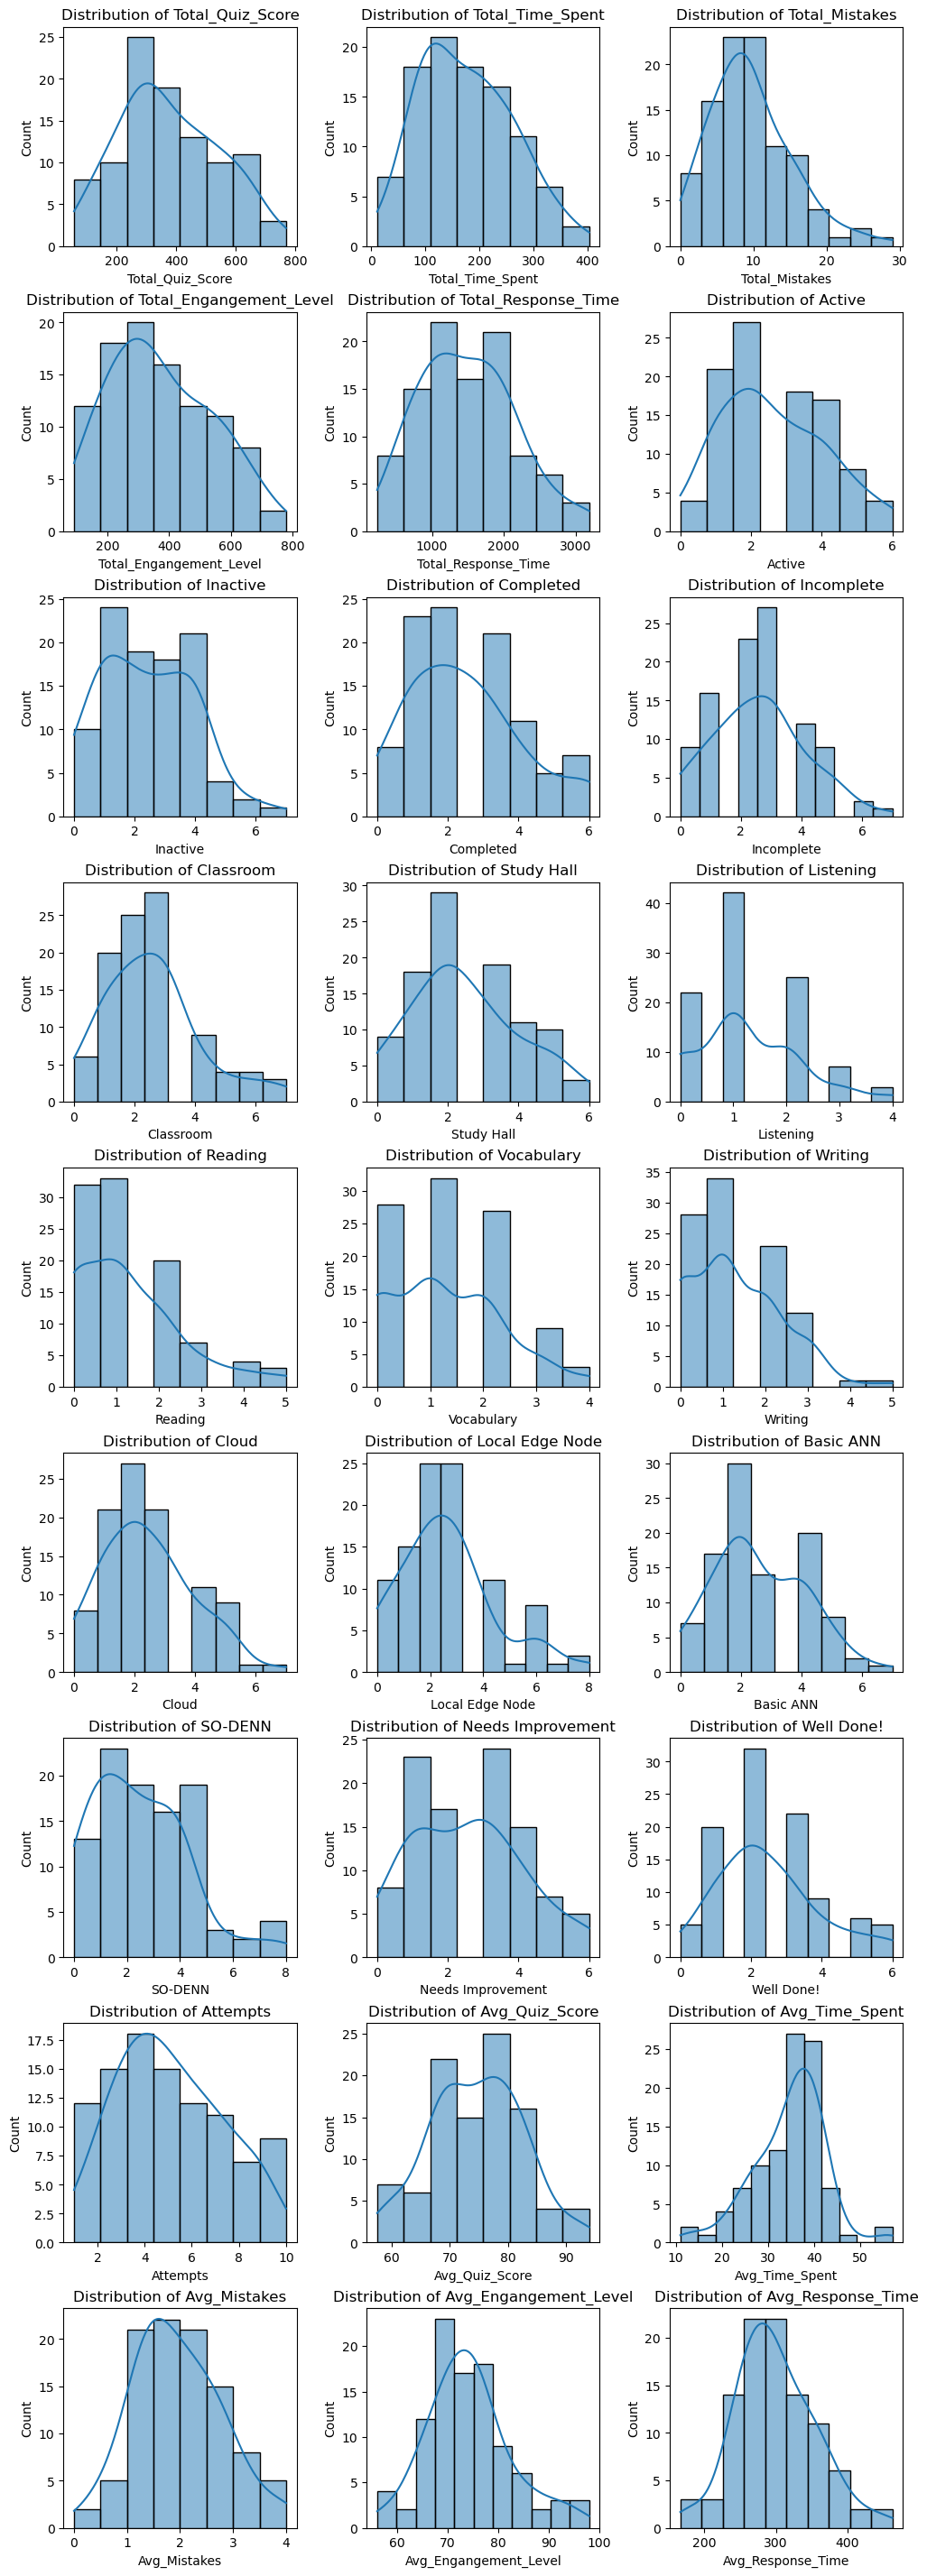

In [39]:
columns = students_df.select_dtypes(include='number').columns
plt.subplots(9,3, figsize=(3*4,9*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(9,3,k)
    sns.histplot(x = i, data = students_df, kde = True)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

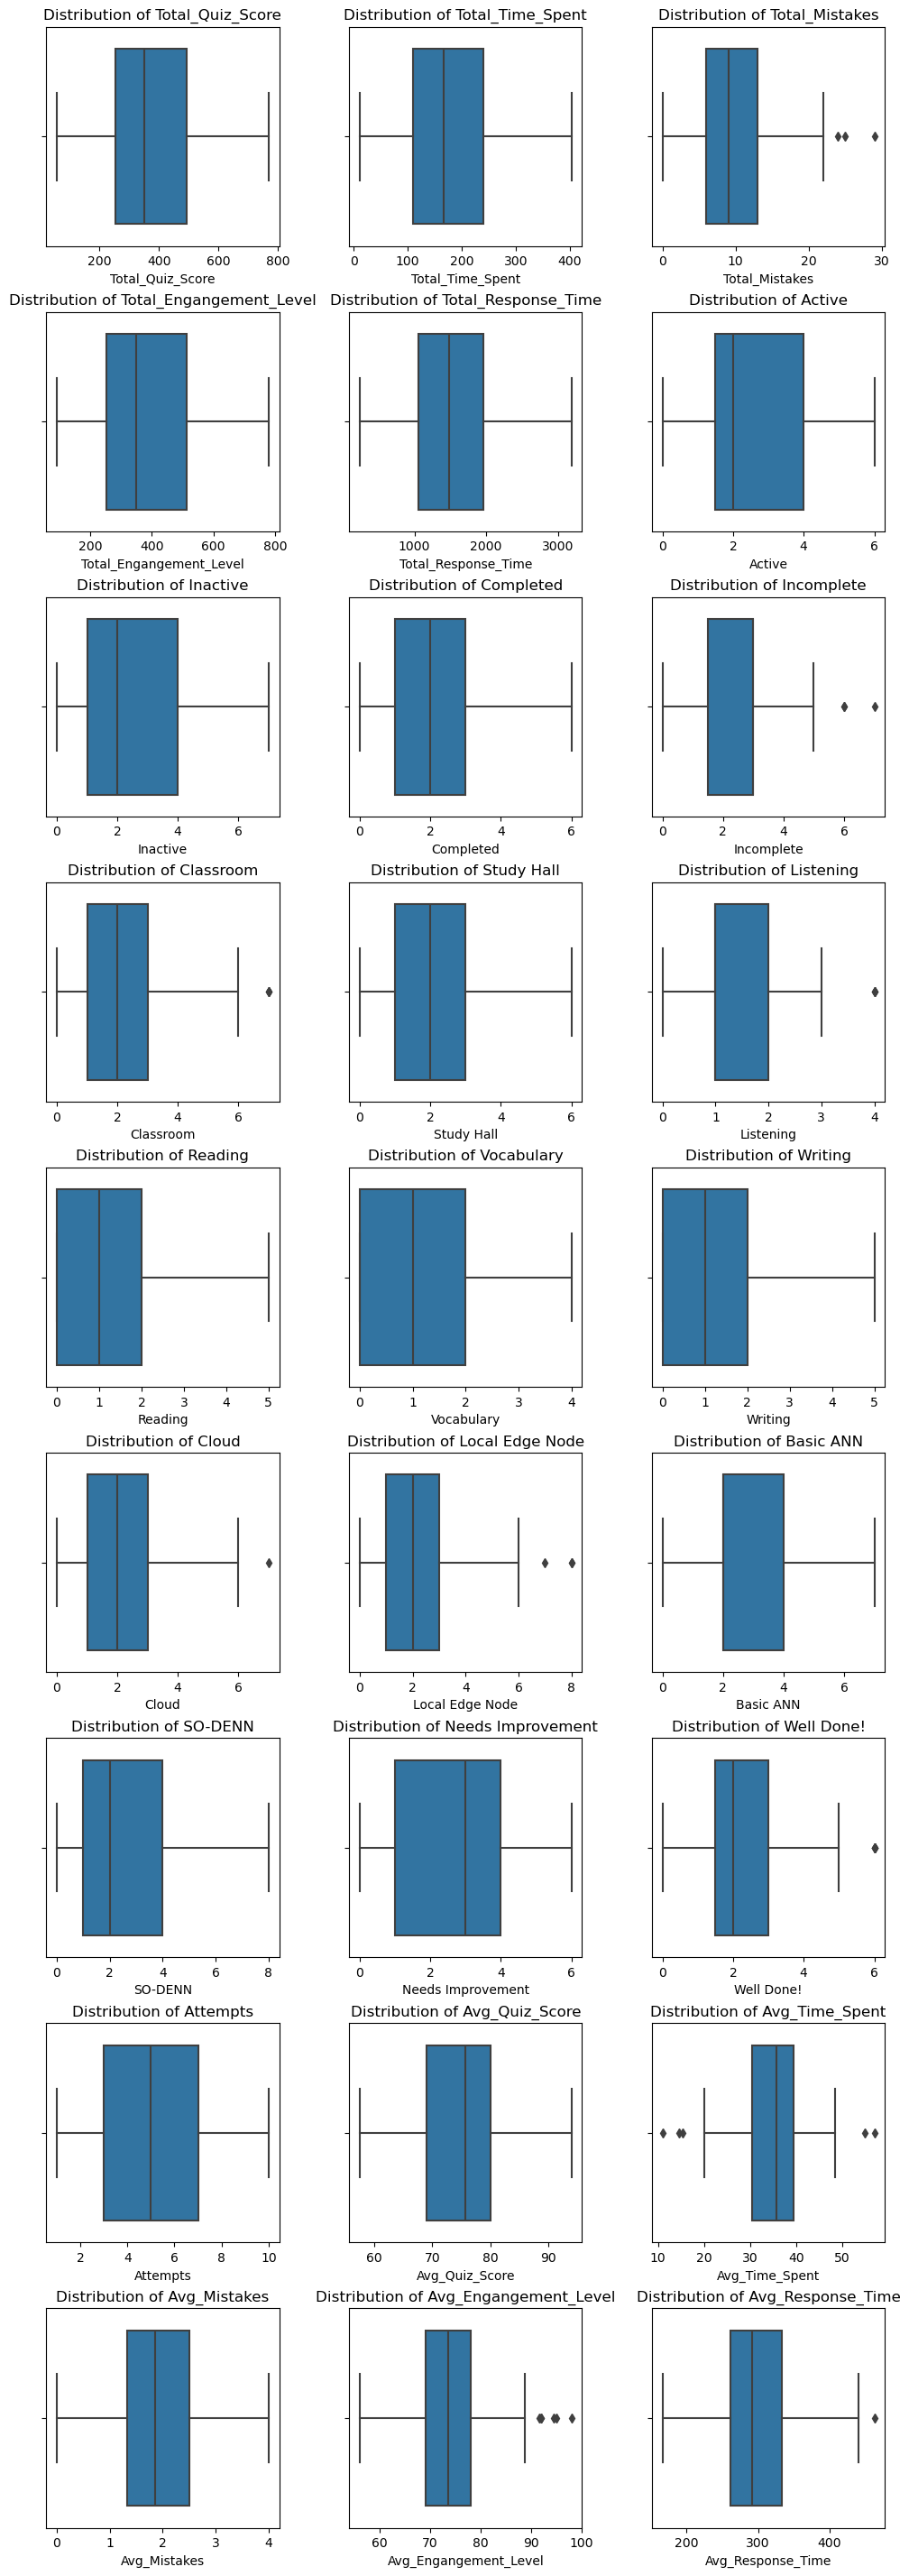

In [40]:
plt.subplots(9,3, figsize=(3*4,9*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(9,3,k)
    sns.boxplot(x = i, data = students_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

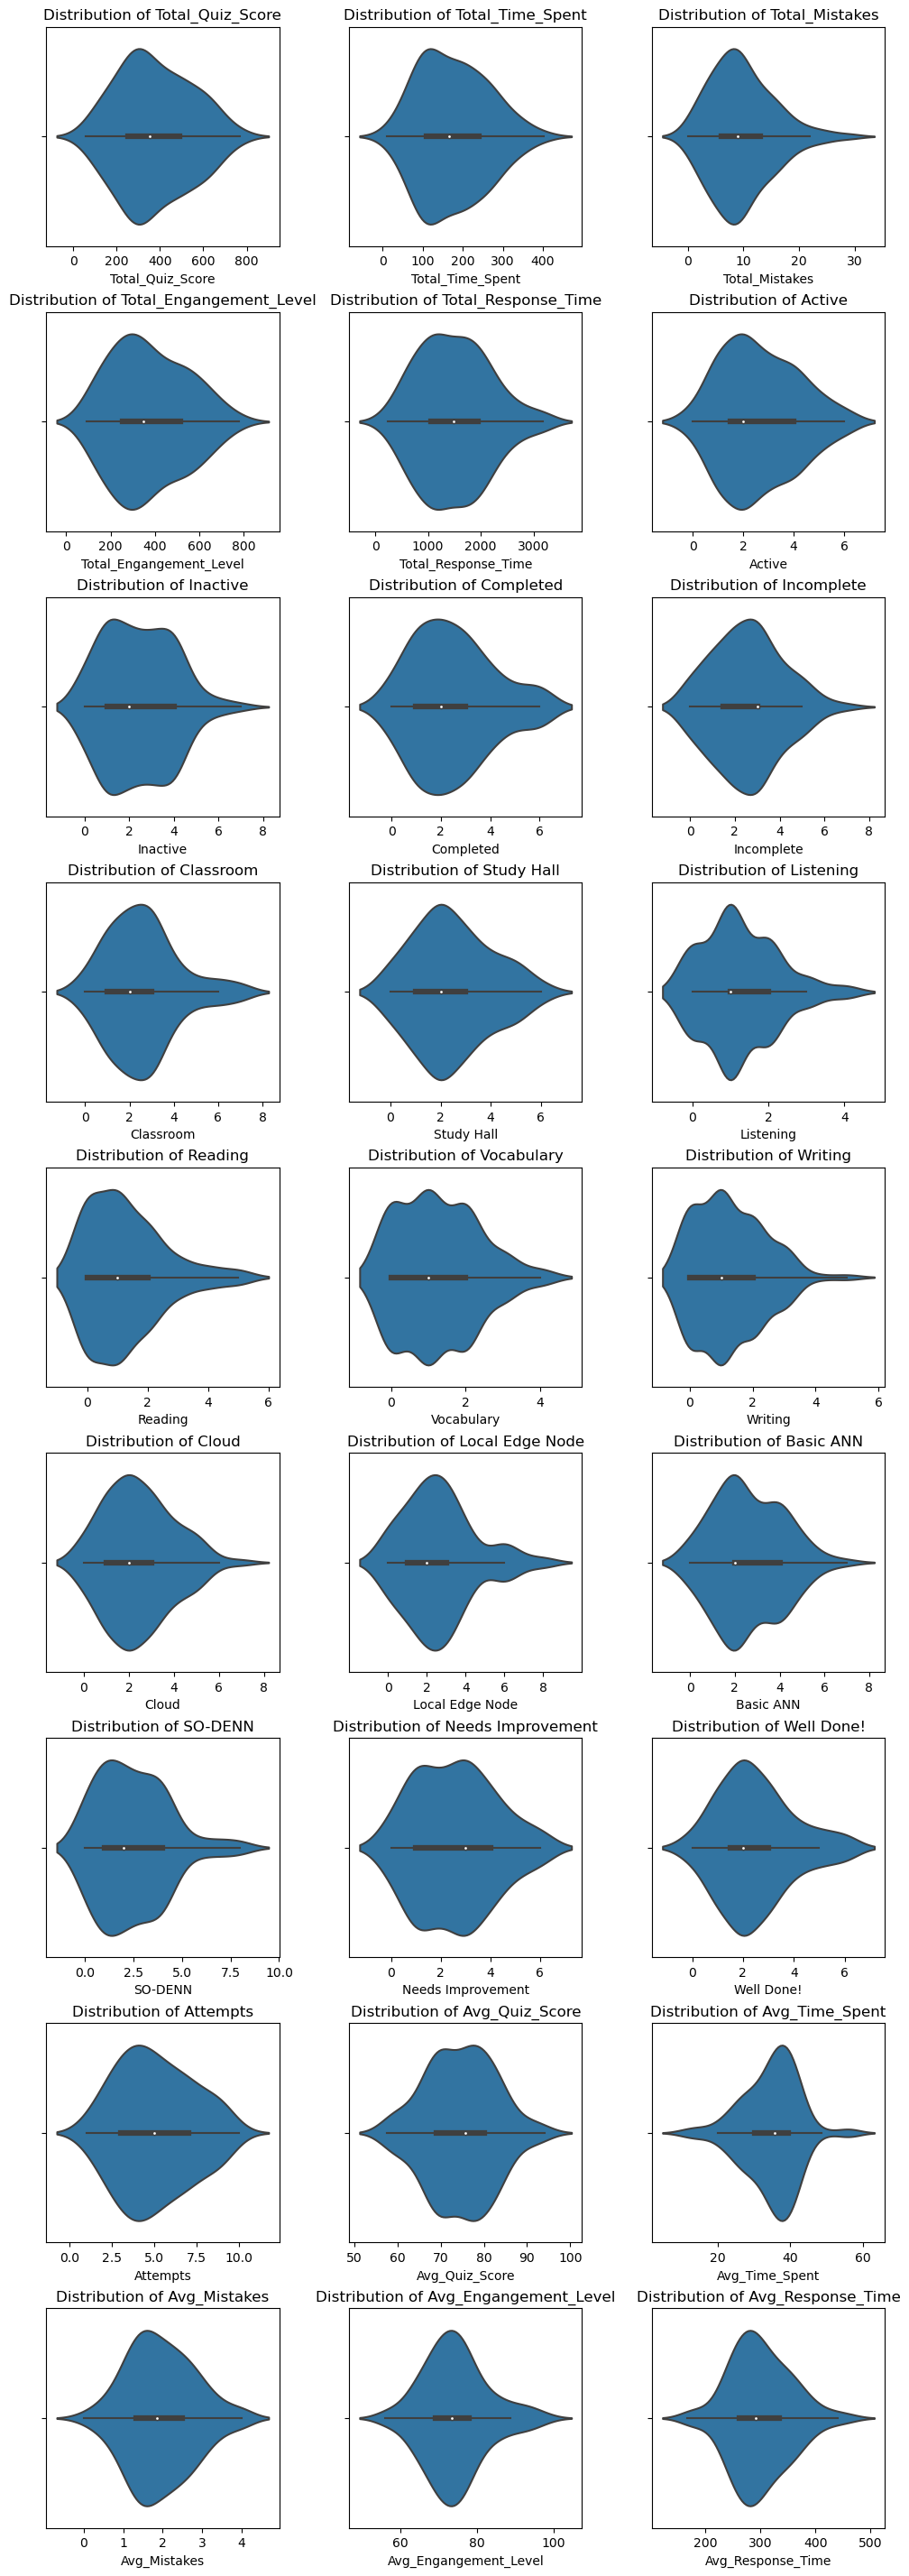

In [41]:
plt.subplots(9,3, figsize=(3*4,9*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(9,3,k)
    sns.violinplot(x = i, data = students_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

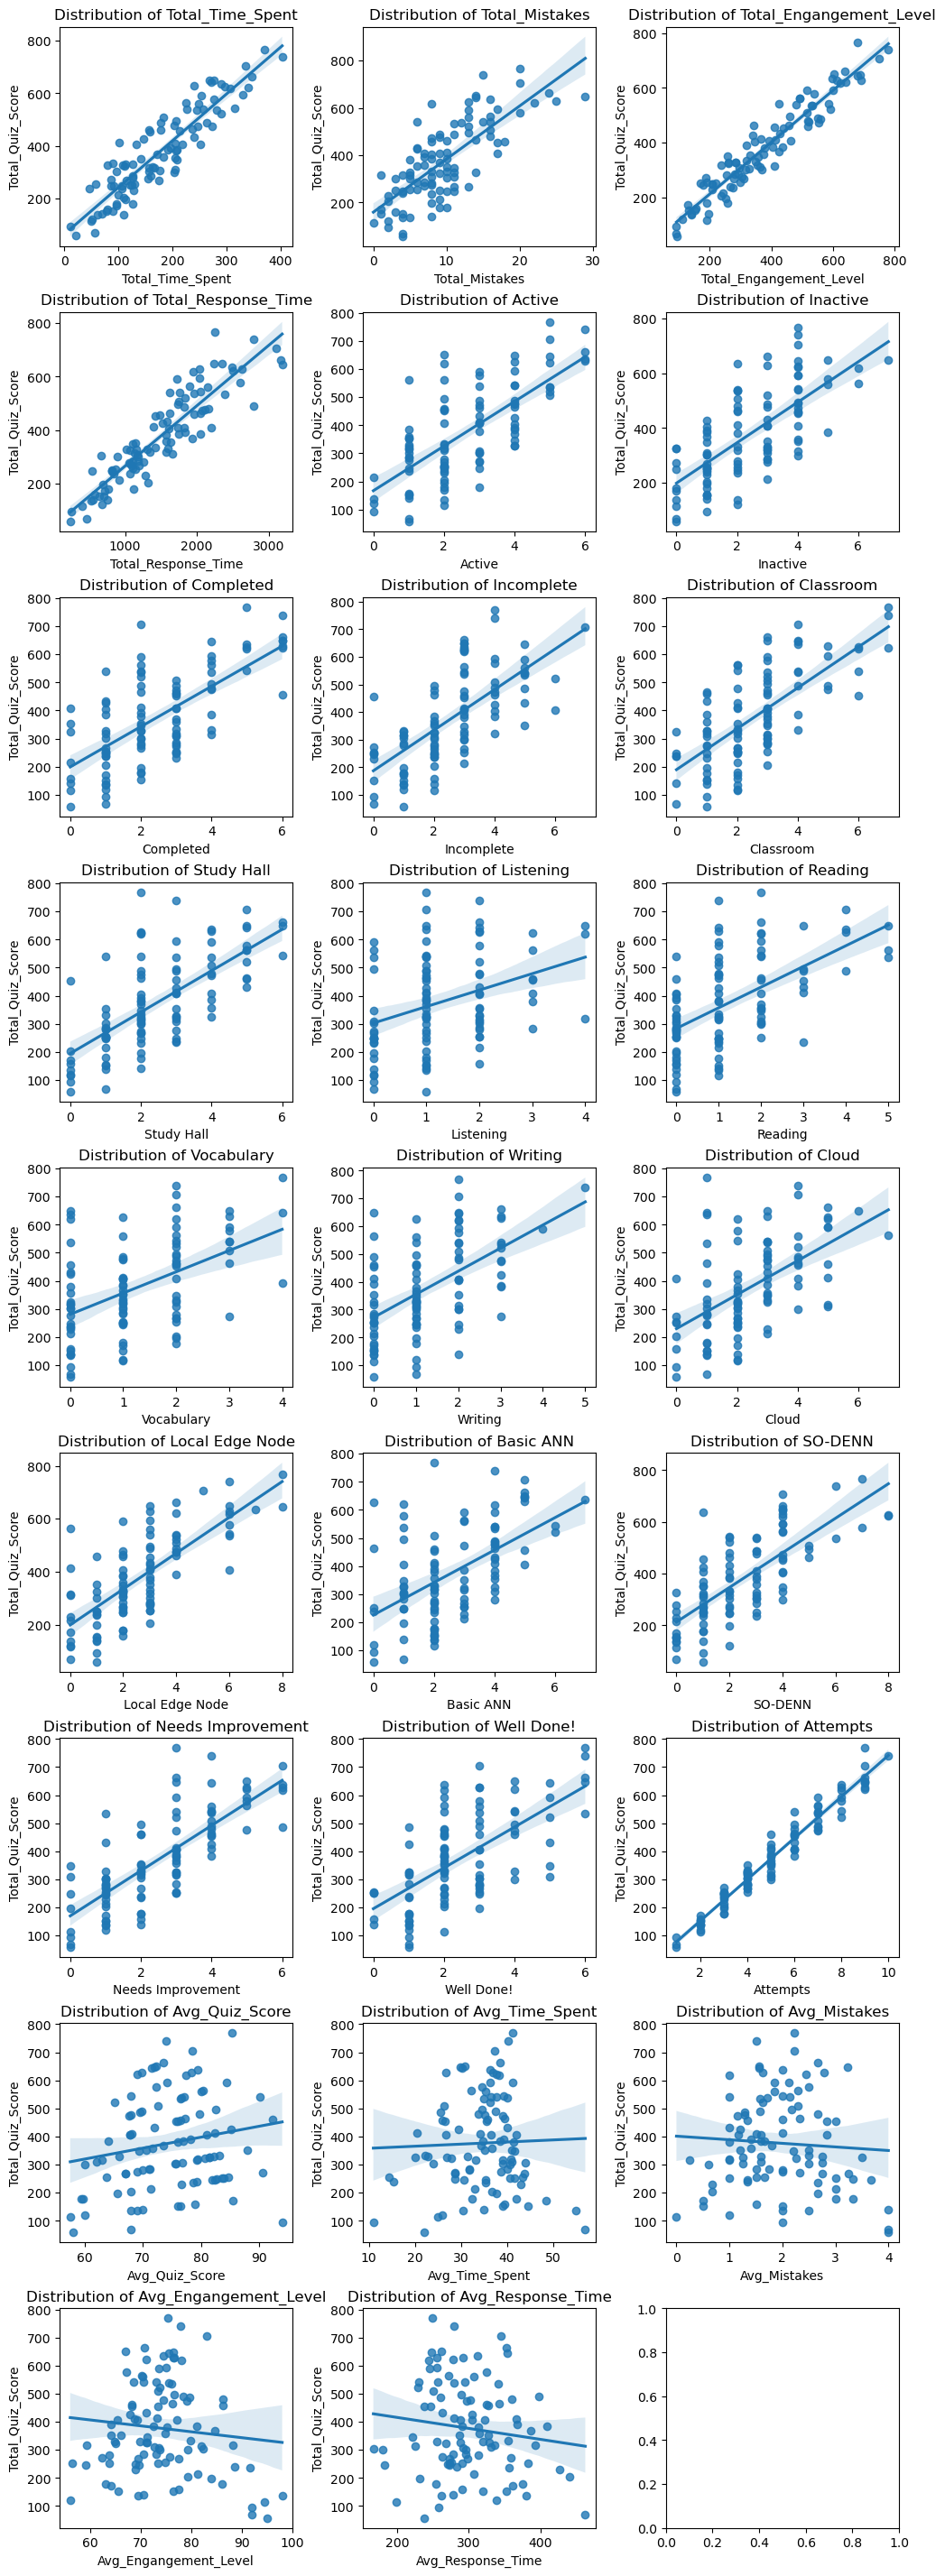

In [42]:
plt.subplots(9,3, figsize=(3*4,9*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns[1:]:
    plt.subplot(9,3,k)
    sns.regplot(x = i, data = students_df, y = 'Total_Quiz_Score')
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

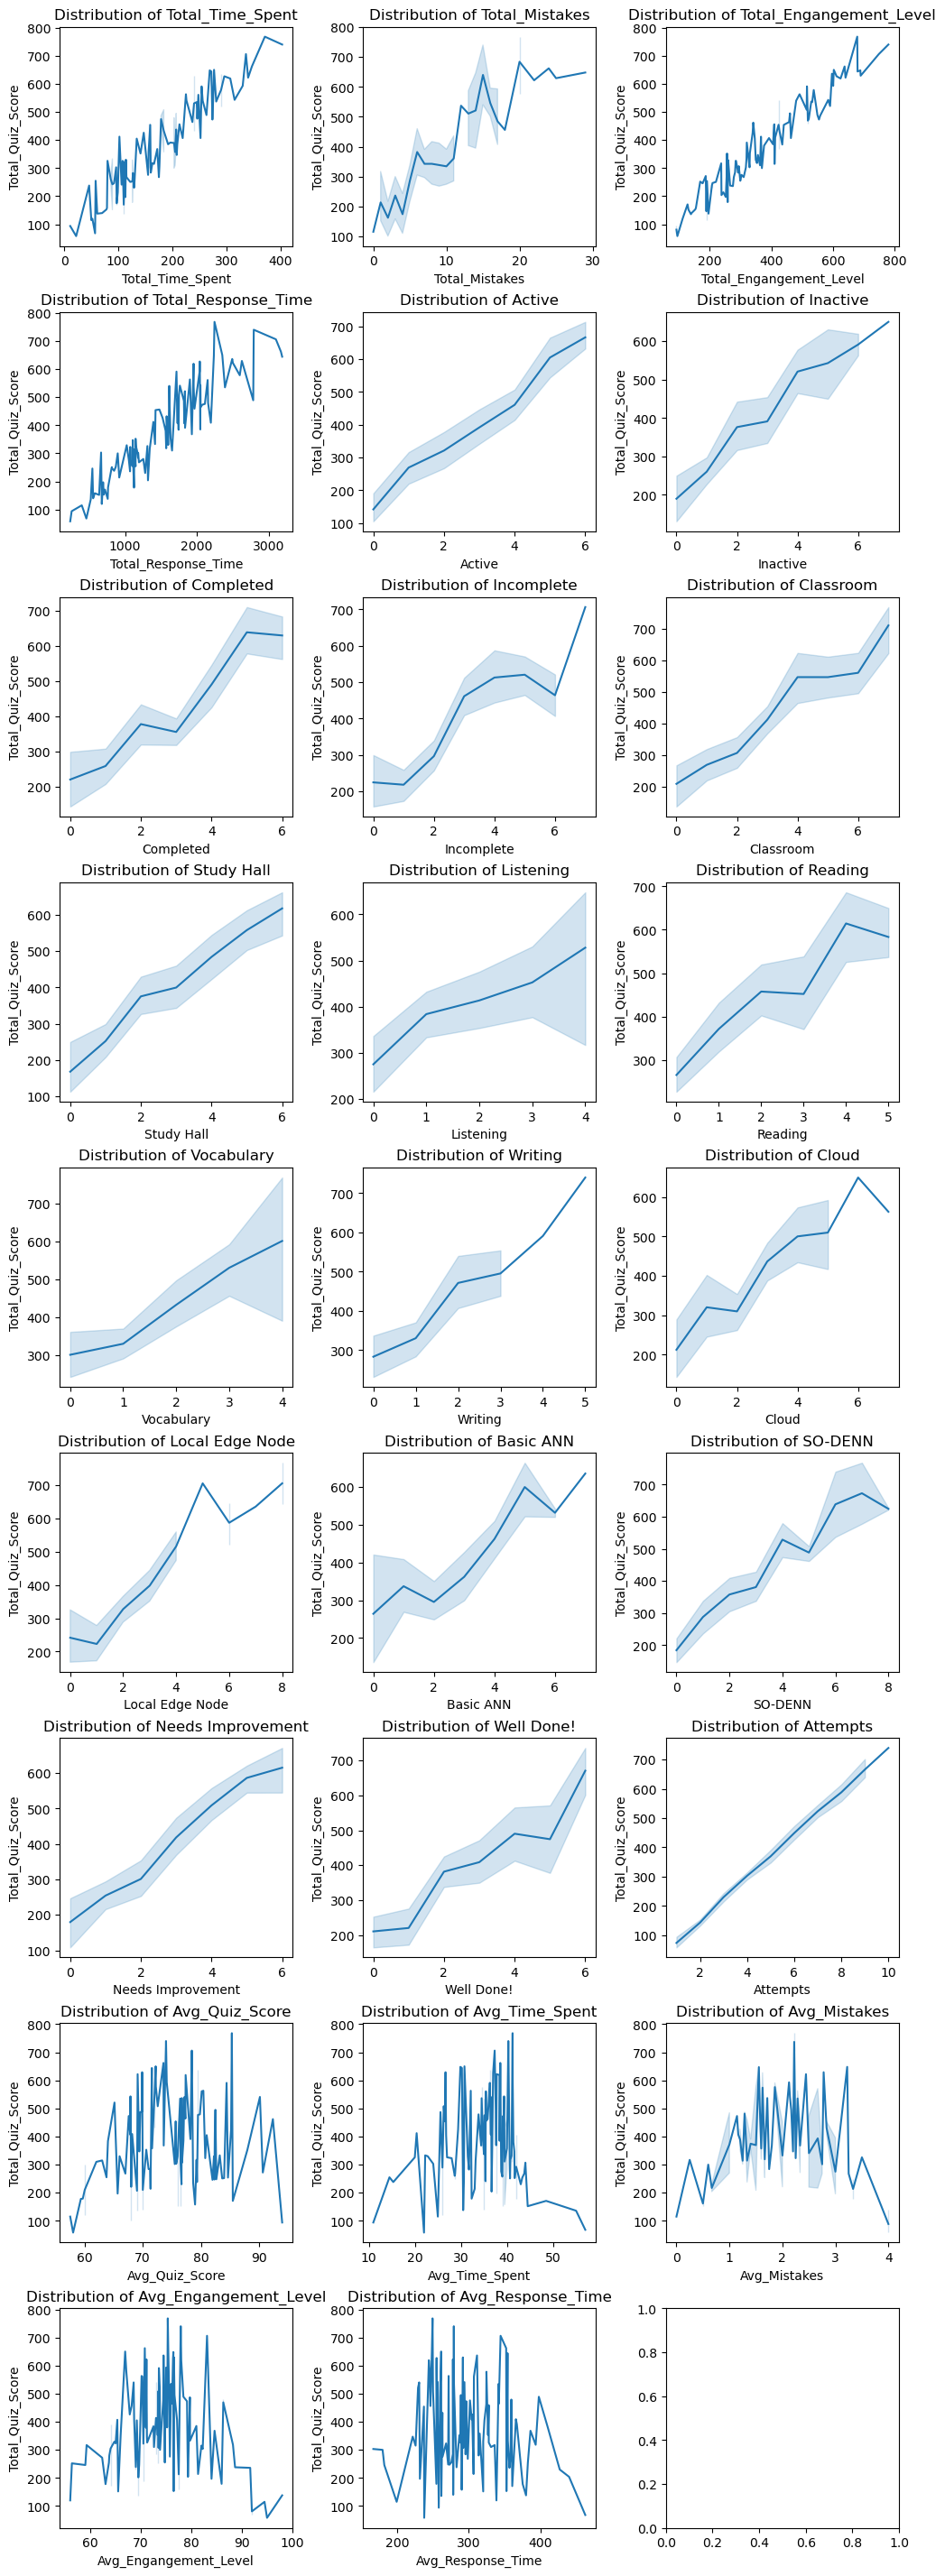

In [43]:
plt.subplots(9,3, figsize=(3*4,9*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns[1:]:
    plt.subplot(9,3,k)
    sns.lineplot(x = i, data = students_df, y = 'Total_Quiz_Score')
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

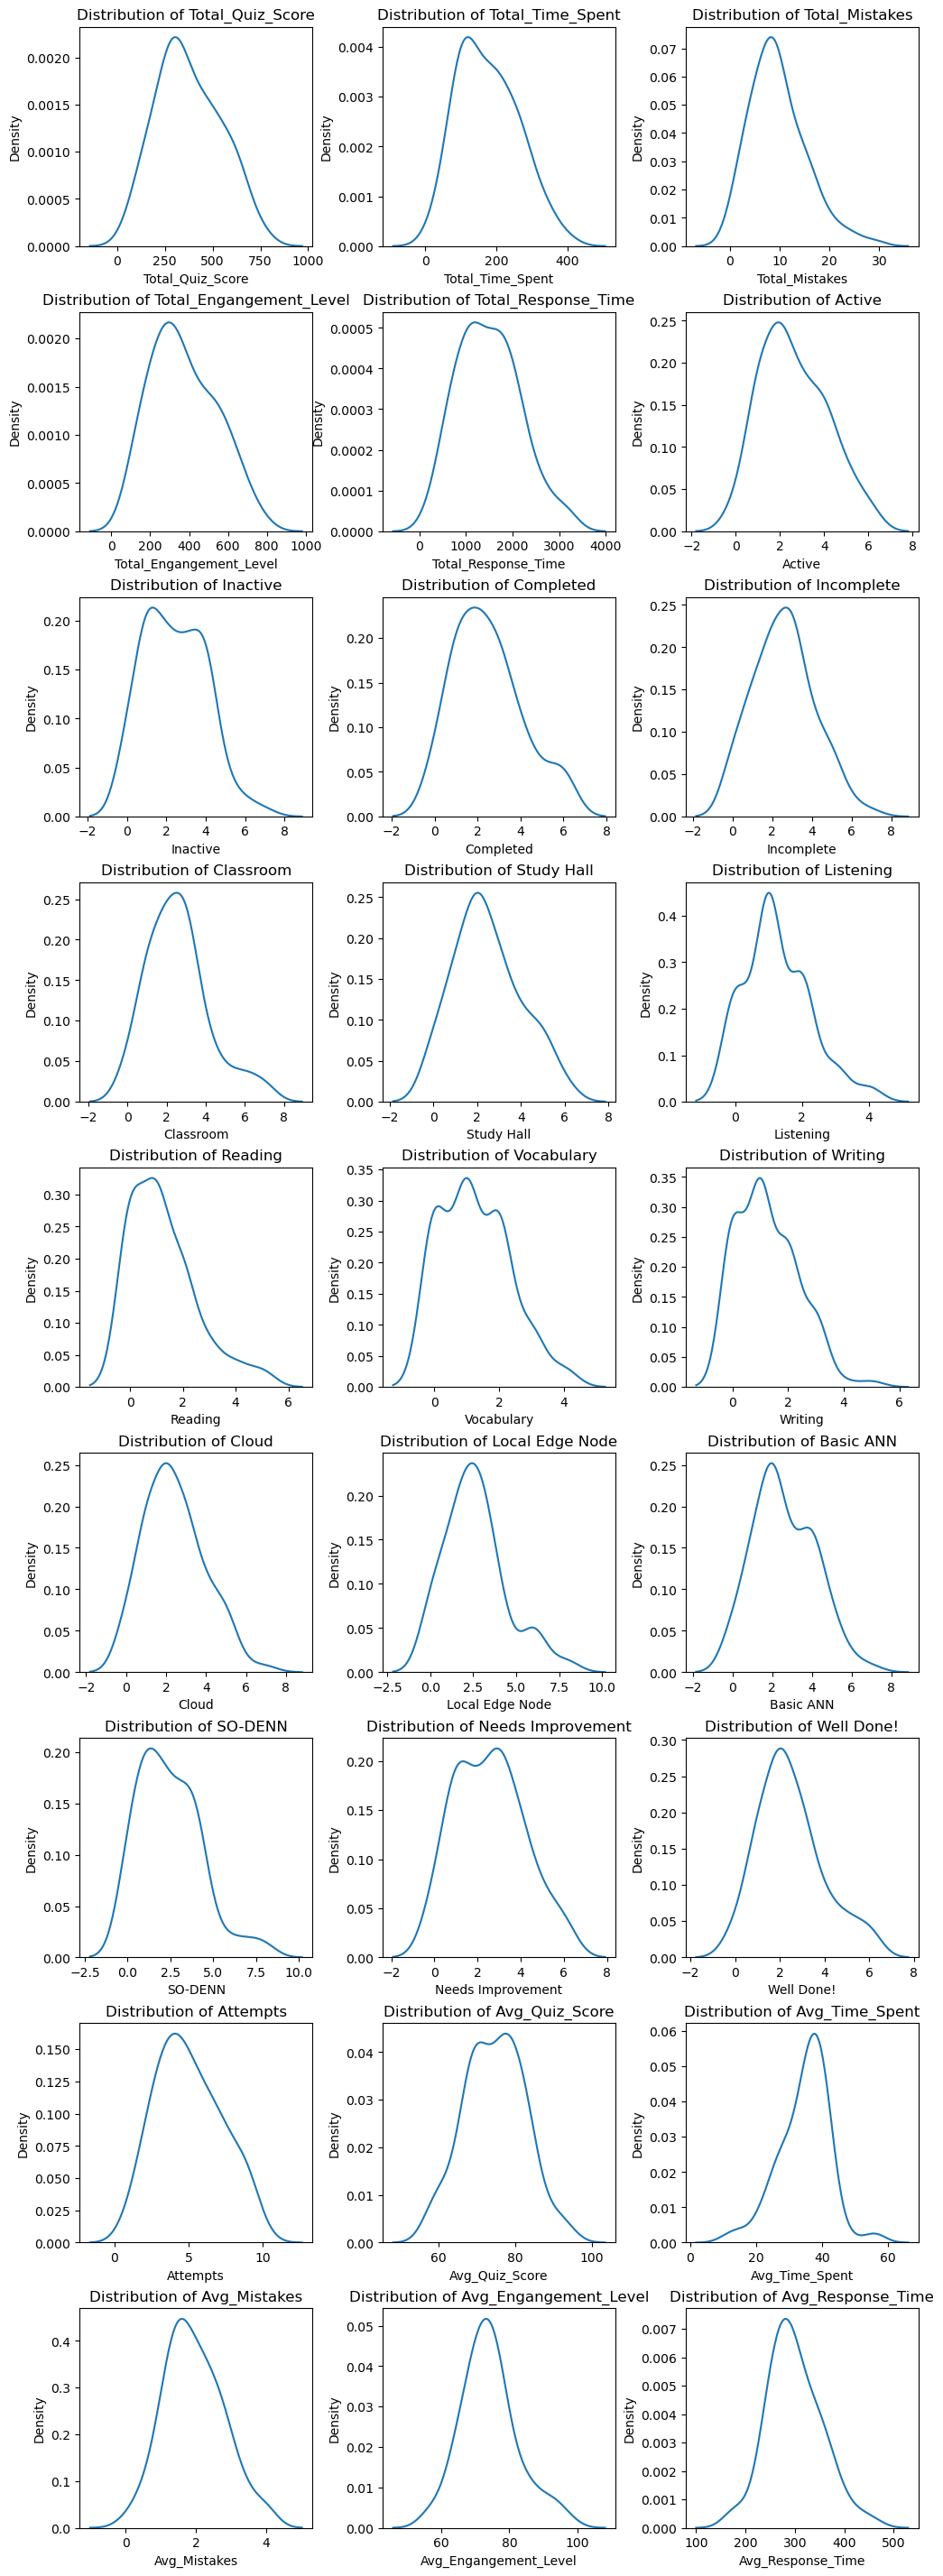

In [44]:
plt.subplots(9,3, figsize=(3*4,9*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns:
    plt.subplot(9,3,k)
    sns.kdeplot(x = i, data = students_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

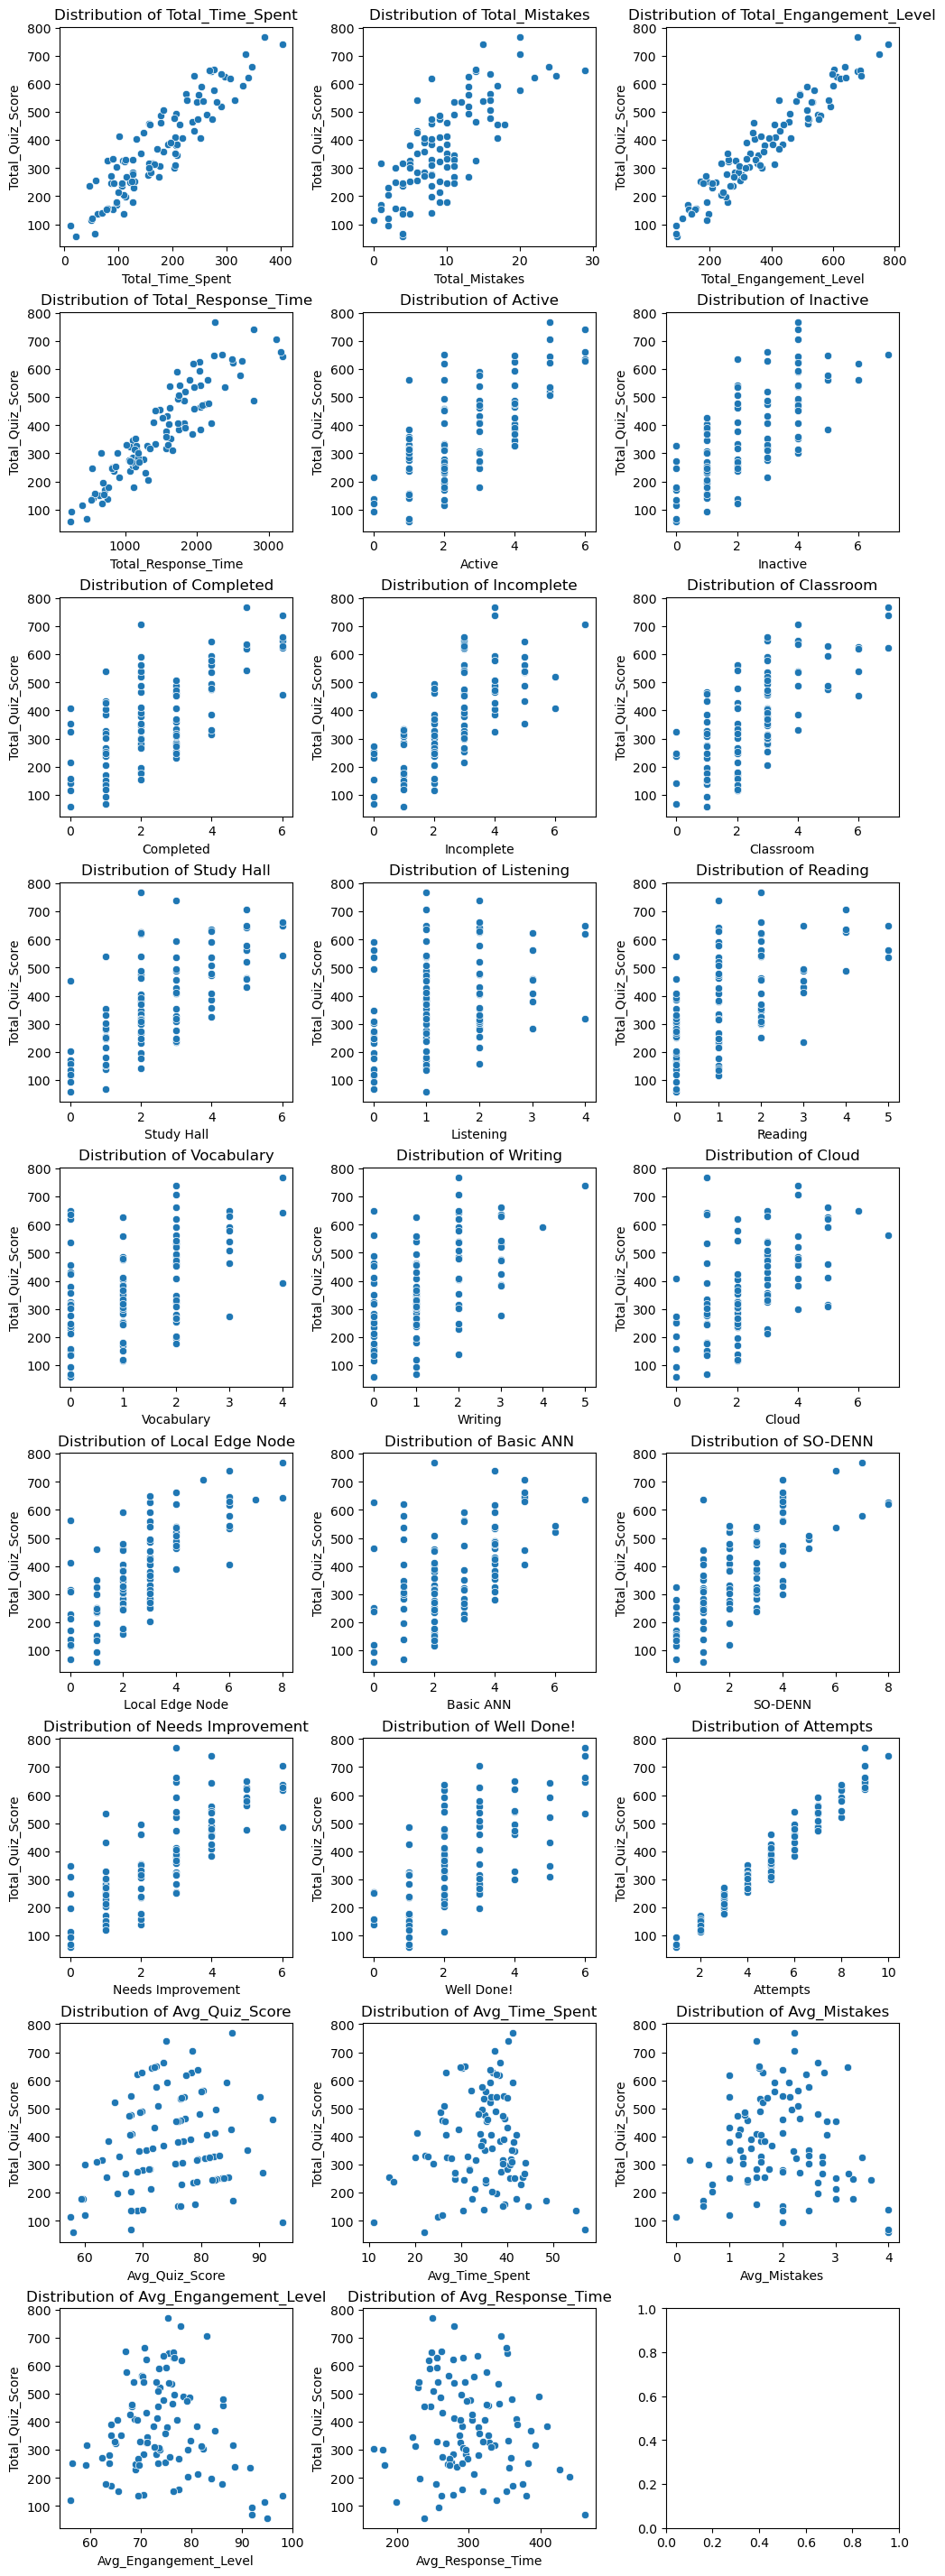

In [45]:
plt.subplots(9,3, figsize=(3*4,9*4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in columns[1:]:
    plt.subplot(9,3,k)
    sns.scatterplot(x = i, data = students_df, y = 'Total_Quiz_Score')
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

#### Performers

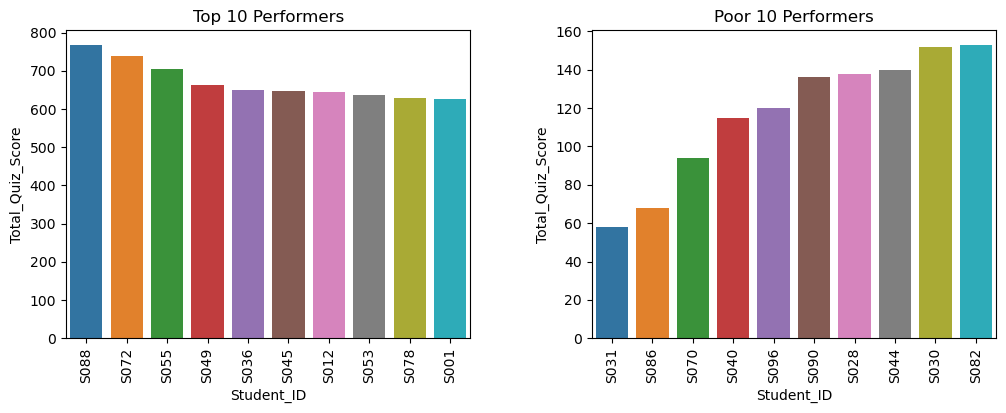

In [46]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Total_Quiz_Score']].sort_values(by = 'Total_Quiz_Score', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Total_Quiz_Score', data = top_performers)
plt.title('Top 10 Performers')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Total_Quiz_Score']].sort_values(by = 'Total_Quiz_Score')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Total_Quiz_Score', data = poor_performers)
plt.title('Poor 10 Performers')
plt.xticks(rotation = 90)
plt.show()

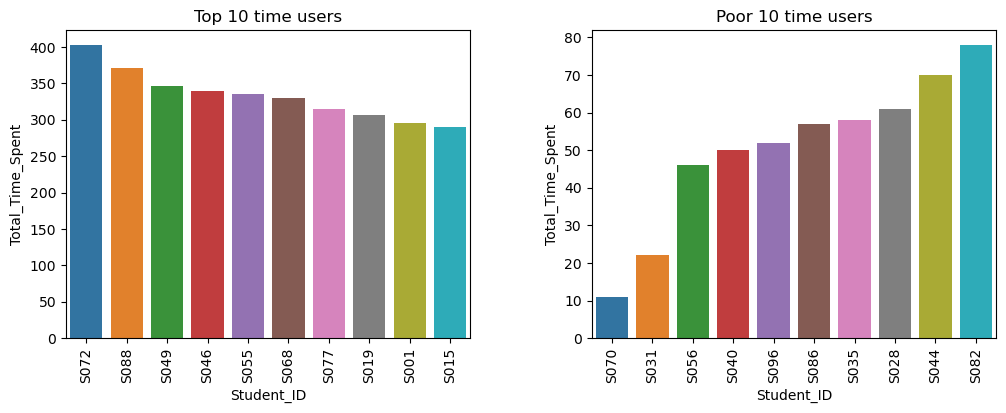

In [47]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Total_Time_Spent']].sort_values(by = 'Total_Time_Spent', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Total_Time_Spent', data = top_performers)
plt.title('Top 10 time users')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Total_Time_Spent']].sort_values(by = 'Total_Time_Spent')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Total_Time_Spent', data = poor_performers)
plt.title('Poor 10 time users')
plt.xticks(rotation = 90)
plt.show()

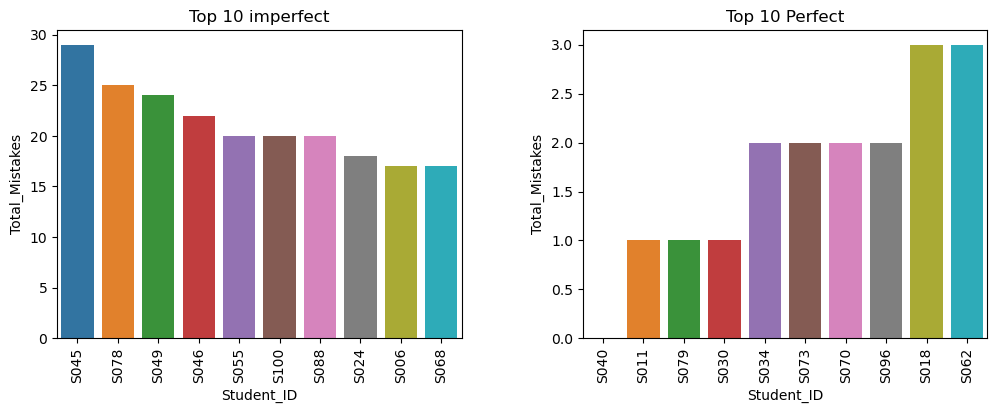

In [48]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Total_Mistakes']].sort_values(by = 'Total_Mistakes', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Total_Mistakes', data = top_performers)
plt.title('Top 10 imperfect')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Total_Mistakes']].sort_values(by = 'Total_Mistakes')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Total_Mistakes', data = poor_performers)
plt.title('Top 10 Perfect')
plt.xticks(rotation = 90)
plt.show()

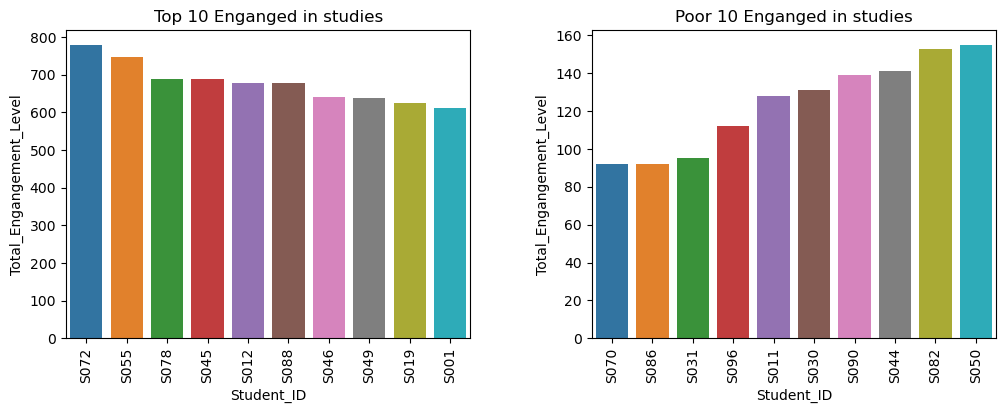

In [49]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Total_Engangement_Level']].sort_values(by = 'Total_Engangement_Level', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Total_Engangement_Level', data = top_performers)
plt.title('Top 10 Enganged in studies')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Total_Engangement_Level']].sort_values(by = 'Total_Engangement_Level')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Total_Engangement_Level', data = poor_performers)
plt.title('Poor 10 Enganged in studies')
plt.xticks(rotation = 90)
plt.show()

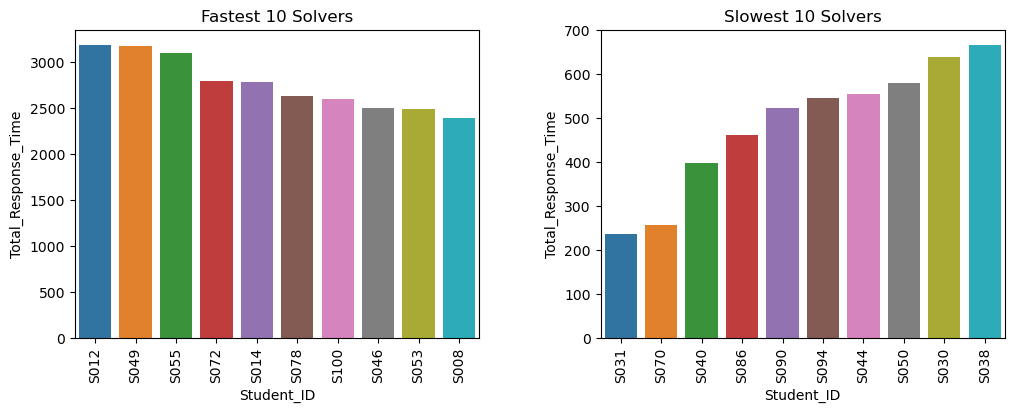

In [50]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Total_Response_Time']].sort_values(by = 'Total_Response_Time', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Total_Response_Time', data = top_performers)
plt.title('Fastest 10 Solvers')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Total_Response_Time']].sort_values(by = 'Total_Response_Time')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Total_Response_Time', data = poor_performers)
plt.title('Slowest 10 Solvers')
plt.xticks(rotation = 90)
plt.show()

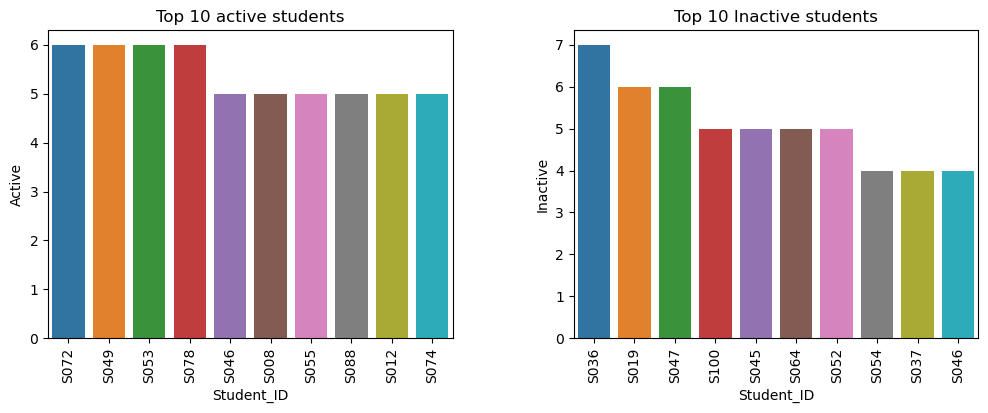

In [51]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Active']].sort_values(by = 'Active', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Active', data = top_performers)
plt.title('Top 10 active students')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Inactive']].sort_values(by = 'Inactive', ascending=False)[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Inactive', data = poor_performers)
plt.title('Top 10 Inactive students')
plt.xticks(rotation = 90)
plt.show()

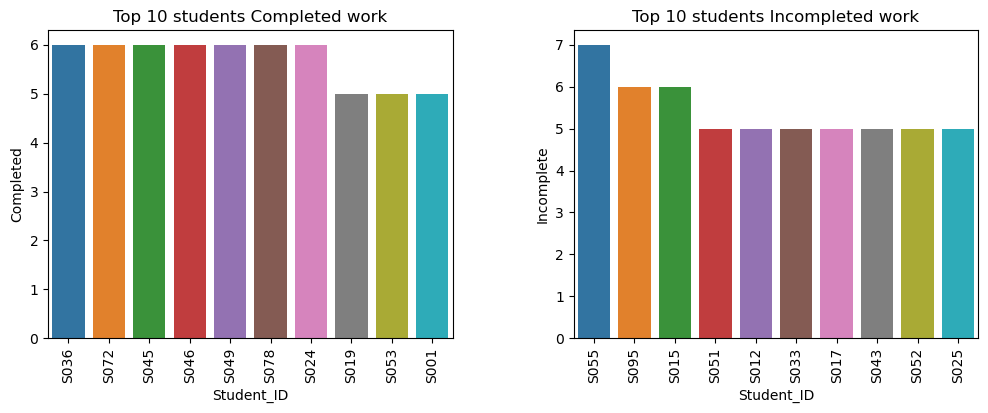

In [52]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Completed']].sort_values(by = 'Completed', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Completed', data = top_performers)
plt.title('Top 10 students Completed work')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Incomplete']].sort_values(by = 'Incomplete', ascending=False)[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Incomplete', data = poor_performers)
plt.title('Top 10 students Incompleted work')
plt.xticks(rotation = 90)
plt.show()

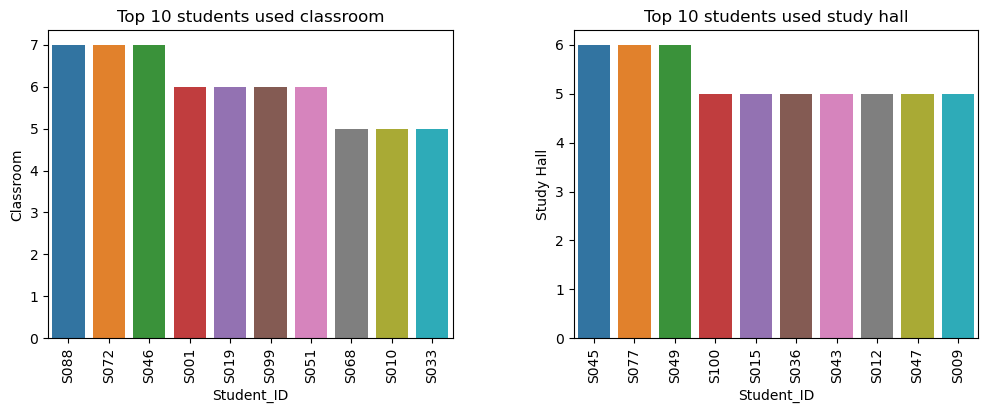

In [53]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Classroom']].sort_values(by = 'Classroom', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Classroom', data = top_performers)
plt.title('Top 10 students used classroom')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Study Hall']].sort_values(by = 'Study Hall', ascending=False)[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Study Hall', data = poor_performers)
plt.title('Top 10 students used study hall')
plt.xticks(rotation = 90)
plt.show()

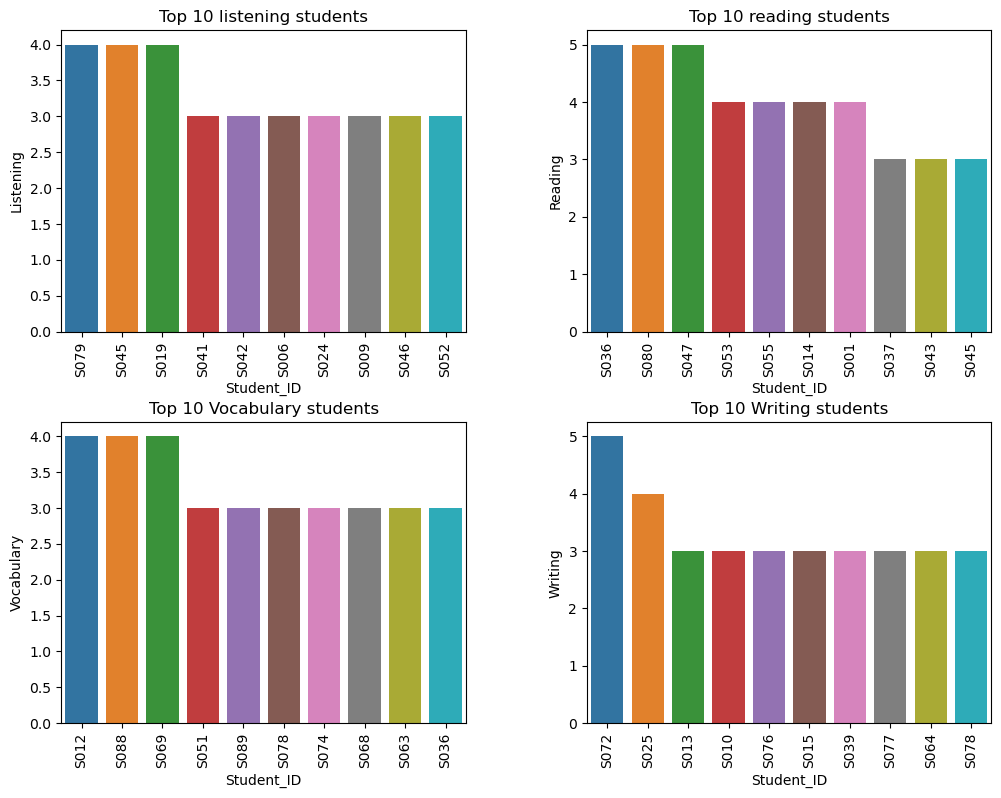

In [54]:
plt.subplots(2, 2, figsize = (12, 9))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

top_performers = students_df[['Student_ID', 'Listening']].sort_values(by = 'Listening', ascending=False)[:10]
plt.subplot(2, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Listening', data = top_performers)
plt.title('Top 10 listening students')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Reading']].sort_values(by = 'Reading', ascending=False)[:10]
plt.subplot(2, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Reading', data = poor_performers)
plt.title('Top 10 reading students')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Vocabulary']].sort_values(by = 'Vocabulary', ascending=False)[:10]
plt.subplot(2, 2, 3)
sns.barplot(x = 'Student_ID', y = 'Vocabulary', data = poor_performers)
plt.title('Top 10 Vocabulary students')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Writing']].sort_values(by = 'Writing', ascending=False)[:10]
plt.subplot(2, 2, 4)
sns.barplot(x = 'Student_ID', y = 'Writing', data = poor_performers)
plt.title('Top 10 Writing students')
plt.xticks(rotation = 90)

plt.show()

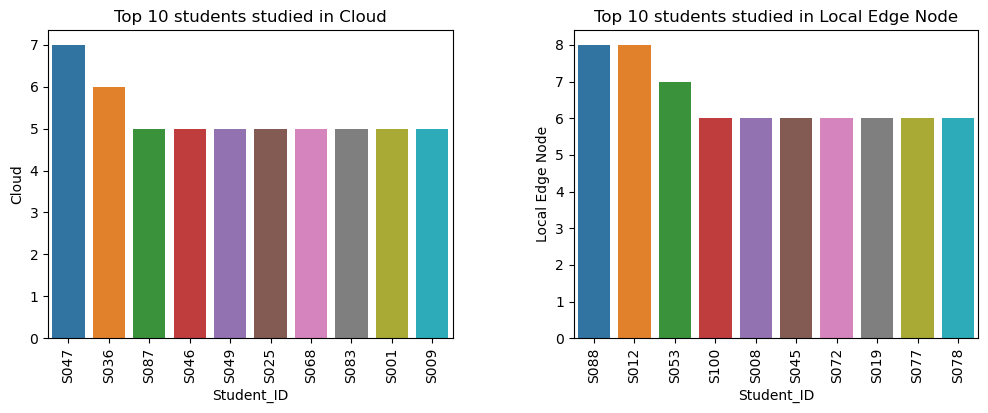

In [55]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Cloud']].sort_values(by = 'Cloud', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Cloud', data = top_performers)
plt.title('Top 10 students studied in Cloud')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Local Edge Node']].sort_values(by = 'Local Edge Node', ascending=False)[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Local Edge Node', data = poor_performers)
plt.title('Top 10 students studied in Local Edge Node')
plt.xticks(rotation = 90)
plt.show()

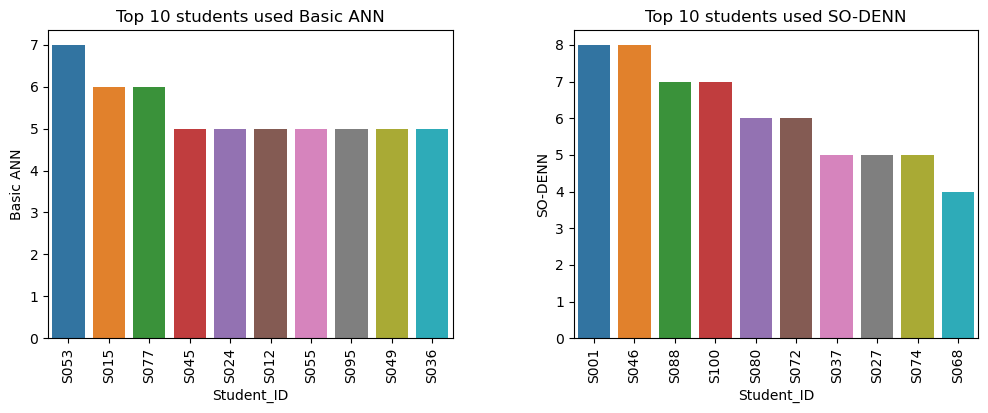

In [56]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Basic ANN']].sort_values(by = 'Basic ANN', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Basic ANN', data = top_performers)
plt.title('Top 10 students used Basic ANN')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'SO-DENN']].sort_values(by = 'SO-DENN', ascending=False)[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'SO-DENN', data = poor_performers)
plt.title('Top 10 students used SO-DENN')
plt.xticks(rotation = 90)
plt.show()

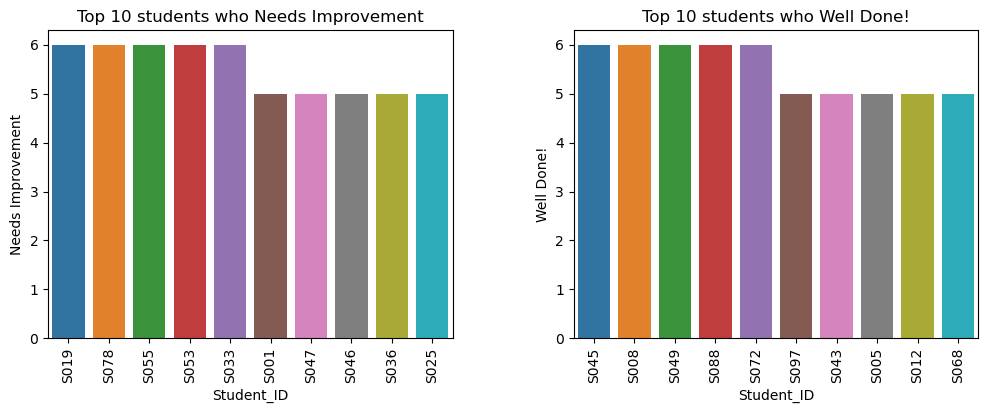

In [57]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Needs Improvement']].sort_values(by = 'Needs Improvement', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Needs Improvement', data = top_performers)
plt.title('Top 10 students who Needs Improvement')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Well Done!']].sort_values(by = 'Well Done!', ascending=False)[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Well Done!', data = poor_performers)
plt.title('Top 10 students who Well Done!')
plt.xticks(rotation = 90)
plt.show()

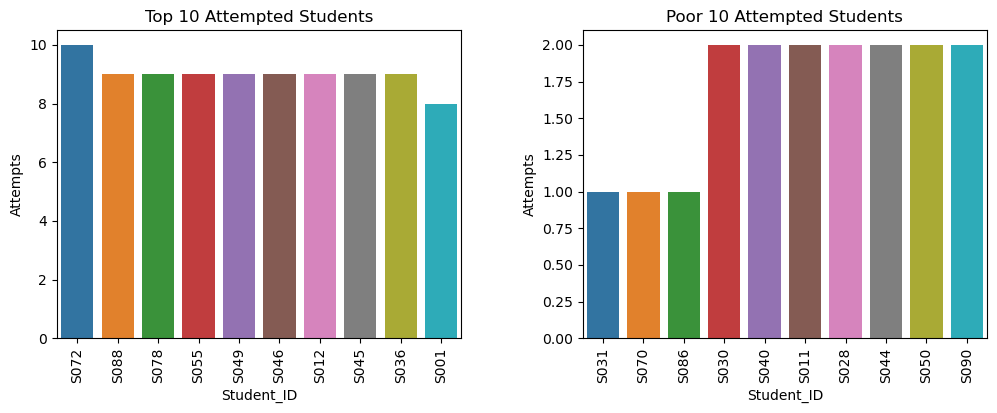

In [58]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Attempts']].sort_values(by = 'Attempts', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Attempts', data = top_performers)
plt.title('Top 10 Attempted Students')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Attempts']].sort_values(by = 'Attempts')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Attempts', data = poor_performers)
plt.title('Poor 10 Attempted Students')
plt.xticks(rotation = 90)
plt.show()

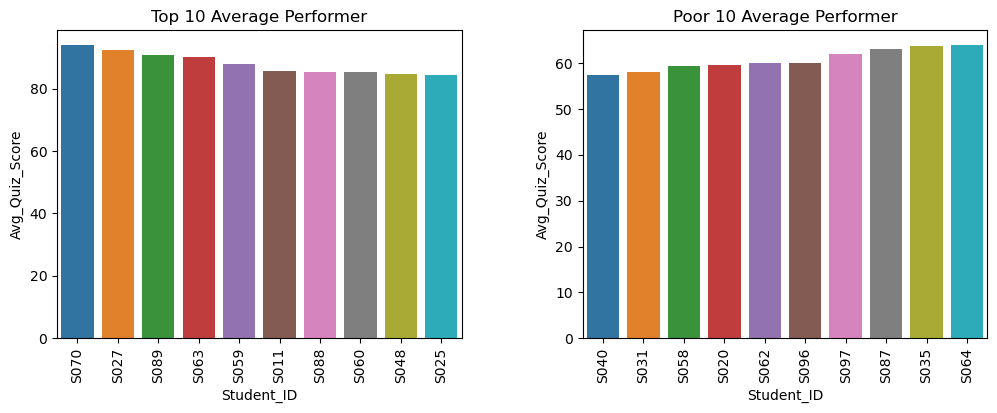

In [59]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Avg_Quiz_Score']].sort_values(by = 'Avg_Quiz_Score', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Avg_Quiz_Score', data = top_performers)
plt.title('Top 10 Average Performer')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Avg_Quiz_Score']].sort_values(by = 'Avg_Quiz_Score')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Avg_Quiz_Score', data = poor_performers)
plt.title('Poor 10 Average Performer')
plt.xticks(rotation = 90)
plt.show()

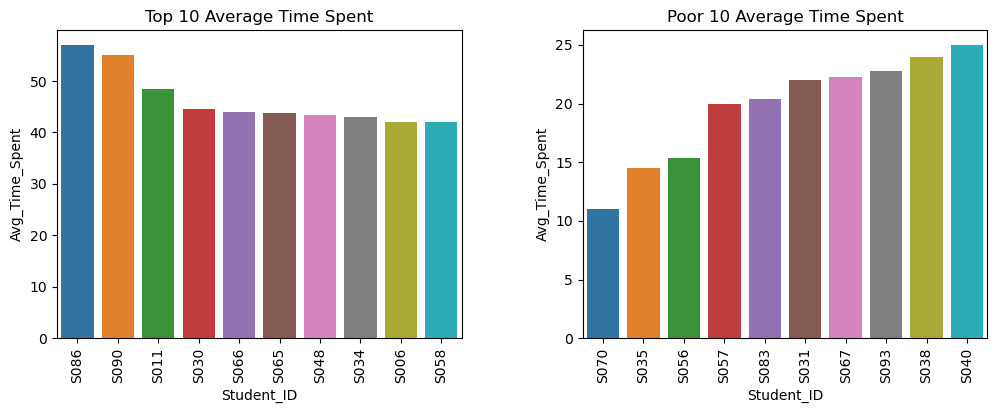

In [60]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Avg_Time_Spent']].sort_values(by = 'Avg_Time_Spent', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Avg_Time_Spent', data = top_performers)
plt.title('Top 10 Average Time Spent')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Avg_Time_Spent']].sort_values(by = 'Avg_Time_Spent')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Avg_Time_Spent', data = poor_performers)
plt.title('Poor 10 Average Time Spent')
plt.xticks(rotation = 90)
plt.show()

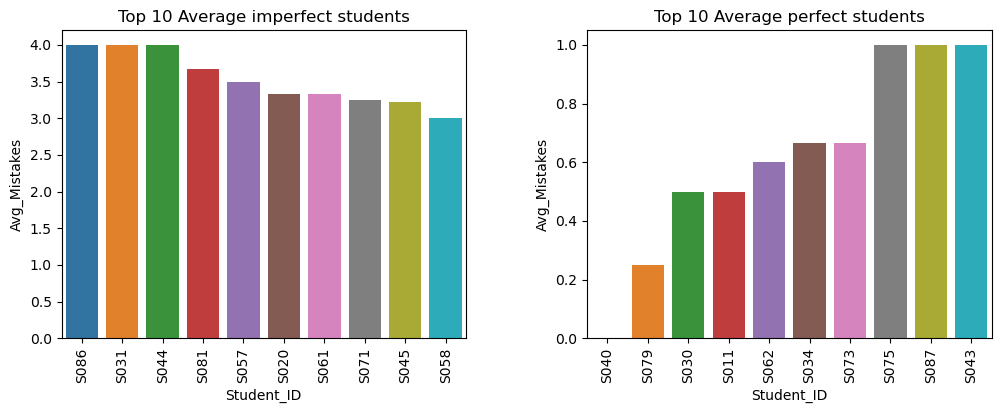

In [61]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Avg_Mistakes']].sort_values(by = 'Avg_Mistakes', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Avg_Mistakes', data = top_performers)
plt.title('Top 10 Average imperfect students')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Avg_Mistakes']].sort_values(by = 'Avg_Mistakes')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Avg_Mistakes', data = poor_performers)
plt.title('Top 10 Average perfect students')
plt.xticks(rotation = 90)
plt.show()

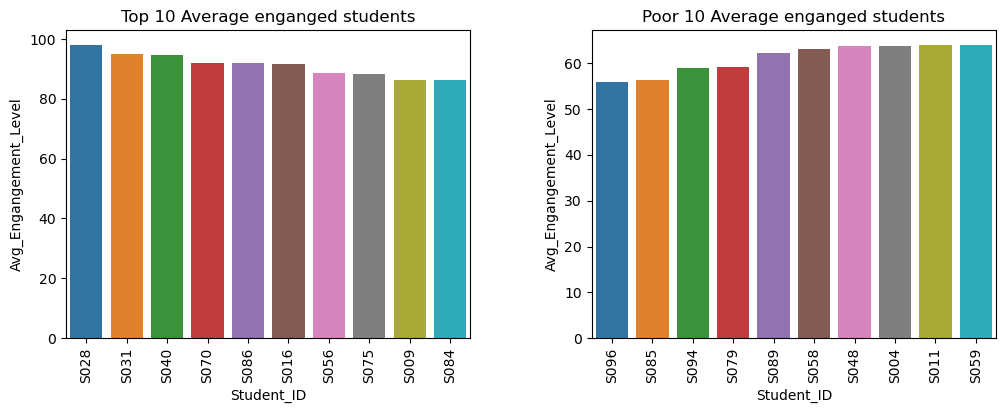

In [62]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Avg_Engangement_Level']].sort_values(by = 'Avg_Engangement_Level', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Avg_Engangement_Level', data = top_performers)
plt.title('Top 10 Average enganged students')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Avg_Engangement_Level']].sort_values(by = 'Avg_Engangement_Level')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Avg_Engangement_Level', data = poor_performers)
plt.title('Poor 10 Average enganged students')
plt.xticks(rotation = 90)
plt.show()

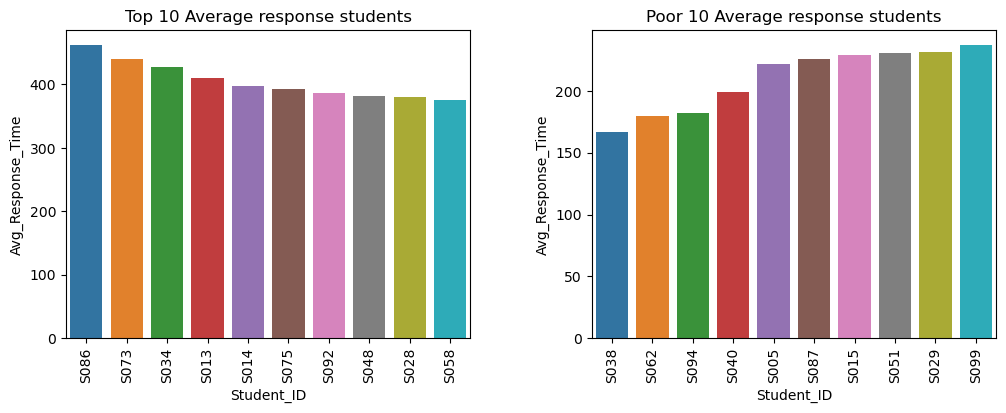

In [63]:
plt.subplots(1, 2, figsize = (12, 4))
plt.subplots_adjust(wspace=0.3)

top_performers = students_df[['Student_ID', 'Avg_Response_Time']].sort_values(by = 'Avg_Response_Time', ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x = 'Student_ID', y = 'Avg_Response_Time', data = top_performers)
plt.title('Top 10 Average response students')
plt.xticks(rotation = 90)

poor_performers = students_df[['Student_ID', 'Avg_Response_Time']].sort_values(by = 'Avg_Response_Time')[:10]
plt.subplot(1, 2, 2)
sns.barplot(x = 'Student_ID', y = 'Avg_Response_Time', data = poor_performers)
plt.title('Poor 10 Average response students')
plt.xticks(rotation = 90)
plt.show()